In [11]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, RepeatVector
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, StratifiedKFold
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("--fusion", help="choose fusion")
parser.add_argument("--png", help="choose png name")
parser.add_argument("--title_name", help="print title name")
args = parser.parse_args()   # arg is variable


def create_model(neurons, act_f, hiddenlayers):
    model = Sequential()

    if hiddenlayers == 2:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 3:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 4:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 5:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 6:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=scores)

    return model

""" 
# Define the list of columns to be dropped from the dataset
drop_list_c1 = ['frame.time_epoch', 'wlan_radio.signal_strength (dbm)', 'wlan_radio.Noise level (dbm)',
                'wlan_radio.SNR (db)', 'wlan_radio.preamble', 'wlan.frag', 'wlan.qos', 'wlan.qos.priority',
                'wlan.qos.ack', 'wlan.fcs.status']
drop_list_c2 = ['wlan.bssid', 'wlan.ta', 'wlan.wep.key', 'radiotap.antenna_signal', 'radiotap.channel.flags.cck',
                'wlan_radio.channel', 'wlan_radio.frequency', 'frame.number', 'radiotap.channel.flags.ofdm',
                'wlan.fc.type']  # 20/36 removed
drop_list_p = ['timestamp', 'mid', 'x', 'y', 'z', 'vgx', 'vgy', 'vgz', 'templ',
               'temph', 'baro', 'bat', 'pitch', 'roll', 'h', ]   # 15/21 removed
# 20 keep (combined)
keep_list = ['frame.len', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.duration', 'wlan.seq', 'wlan.fc.subtype',
             'wlan.flags', 'wlan.fcs', 'wlan.ccmp.extiv', 'data.len', 'radiotap.hdr_length', 'radiotap.signal_quality',
             'wlan_radio.datarate', 'flight_time', 'agx', 'agy', 'agz', 'yaw', 'tof']
keep_list_c = ['frame.len', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.duration', 'wlan.seq', 'wlan.fc.subtype',
               'wlan.flags', 'wlan.fcs', 'wlan.ccmp.extiv', 'data.len', 'radiotap.hdr_length', 'radiotap.signal_quality',
               'wlan_radio.datarate']
keep_list_p = ['flight_time', 'agx', 'agy', 'agz', 'yaw', 'tof', 'pitch', 'vgz']
"""
keep_list = ['frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.bssid', 'wlan.duration', 'wlan.seq', 'wlan.fc.type',
             'wlan.fc.subtype', 'wlan.flags', 'wlan.fcs', 'wlan.fcs.status', 'wlan.ccmp.extiv', 'data.len', 'radiotap.hdr_length',
             'radiotap.signal_quality', 'wlan_radio.datarate', 'wlan_radio.channel', 'wlan_radio.SNR (db)', 'wlan_radio.preamble',
             'pitch', 'roll', 'yaw', 'vgx', 'vgy', 'vgz', 'flight_time', 'agx', 'agy', 'agz', 'tof']  # 32

keep_list_dr_c = ['frame.number', 'frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da',
                  'wlan.duration', 'wlan.seq', 'wlan.fc.type', 'wlan.flags']  # 12
keep_list_dr_cmb = ['frame.number', 'frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da',
                    'wlan.duration', 'wlan.frag', 'wlan.seq', 'wlan.fc.type', 'wlan.flags', 'data.len', 'pitch', 'roll',
                    'templ', 'temph', 'yaw', 'vgx', 'vgy', 'vgz', 'flight_time', 'agx', 'agy', 'agz', 'tof']

keep_list_cn_c = ['frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.bssid', 'wlan.duration', 'wlan.seq', 'wlan.fc.type',
                  'wlan.fc.subtype', 'wlan.flags', 'wlan.fcs', 'wlan.fcs.status', 'wlan.ccmp.extiv', 'data.len', 'radiotap.hdr_length',
                  'radiotap.signal_quality', 'wlan_radio.datarate', 'wlan_radio.channel', 'wlan_radio.SNR (db)', 'wlan_radio.preamble']  # 21
# remove cyber, if requires: wlan.fc.type, wlan.fcs.status, wlan_radio.channel, wlan_radio.preamble

keep_list_p = ['pitch', 'roll', 'yaw', 'vgx', 'vgy', 'vgz', 'flight_time', 'agx', 'agy', 'agz', 'tof']  # 11


# path = os.getcwd()
# fusion = "cyber"
# fusion = drone1_cyber, drone1_physical, drone1_combined, ... central_cyber, central_physical, central_combined
fusion = args.fusion

df = pd.read_csv("../../dataset_central/standardized_dataset_{}.csv".format(fusion))
df = df.set_index(['target'])
target = df['target.value']
df = df.drop(columns=['target.value'], axis=1)

if fusion in ["drone1_cyber", "drone2_cyber", "central_cyber"]:
    df = df[keep_list_cn_c]
elif fusion in ["drone1_physical", "drone2_physical", "central_physical"]:
    df = df[keep_list_p]
elif fusion in ["drone1_combined", "drone2_combined", "central_combined"]:
    df = df[keep_list]

"""
# if fusion == "combined":
#    df = df[keep_list]
if fusion in ["drone1_cyber", "drone2_cyber"]:
    df = df[keep_list_dr_c]
    # df = df.drop(drop_list_c, axis=1)
elif fusion in ["drone1_physical", "drone2_physical", "central_physical"]:
    df = df[keep_list_p]
elif fusion in ["drone1_combined", "drone2_combined"]:
    df = df[keep_list_dr_cmb]
elif fusion in ["central_cyber"]:
    df = df[keep_list_cn_c]
elif fusion in ["central_combined"]:
    df = df[keep_list]
"""

# S = True
X, XX, Y, YY = [np.array(x) for x in train_test_split(df.values, target.values)]


X = np.vstack((X, XX))
Y = np.hstack((Y, YY))

scores = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]

kf = KFold(n_splits=5, shuffle=True)
fin_f1 = []
fin_val_f1 = []
fin_loss = []
fin_val_loss = []
i = 0
itera = ''

sacc = 0
spre = 0
srec = 0
sf1 = 0
sauc = 0

for train, test in kf.split(X, Y):
    if i != 0:
        itera = '_' + str(i)

    model = create_model(256, 'relu', 5)

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss'.format(itera), min_delta=1e-2, patience=5, verbose=0, mode='auto',
                                                  baseline=None, restore_best_weights=True)
    history = model.fit(x=X[train], y=Y[train], validation_data=(X[test], Y[test]), callbacks=[early_stop], epochs=100, batch_size=256).history

    recall = np.array(history['recall'])
    precision = np.array(history['precision'])
    f1 = (2 * ((precision * recall)/(precision + recall)))

    v_recall = np.array(history['val_recall'])
    v_precision = np.array(history['val_precision'])
    v_f1 = (2 * ((v_precision * v_recall)/(v_precision + v_recall)))

    fin_loss.append(history['loss'])
    fin_val_loss.append(history['val_loss'])

    fin_f1.append(f1.tolist())
    fin_val_f1.append(v_f1.tolist())

    sacc += history['val_accuracy'][len(history['val_accuracy']) - 1]
    spre += history['val_precision'][len(history['val_precision']) - 1]
    srec += history['val_recall'][len(history['val_recall']) - 1]
    sf1 += v_f1[v_f1.shape[0] - 1]
    sauc += history['val_auc'][len(history['val_auc']) - 1]

    i += 1


length = max(map(len, fin_f1))
y = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_f1])

length = max(map(len, fin_val_f1))
y2 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_val_f1])

length = max(map(len, fin_loss))
y3 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_loss])

length = max(map(len, fin_val_loss))
y4 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_val_loss])


train_scores_mean = np.nanmean(y, axis=0)
train_scores_std = np.nanstd(y, axis=0)
test_scores_mean = np.nanmean(y2, axis=0)
test_scores_std = np.nanstd(y2, axis=0)

x_ticks = np.arange(length)
title = r"Learning Curves (FNN, 5 layers, 256 neurons, relu, glorot)"
_, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.grid()
axes.fill_between(
    x_ticks,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    x_ticks,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
path_results = 'fnn_results/'

# axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train', linewidth=3)
# axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation', linewidth=3)
axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train')
axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation')
axes.set_ylabel('F1')
axes.set_xlabel('Epoch')
axes.legend(loc='upper left')
# plt.xlim(0, 17)
# plt.savefig(path_results + args.png)
plt.savefig("fnn_results/F1_{}.png".format(fusion))
# plt.show()


train_scores_mean = np.nanmean(y3, axis=0)
train_scores_std = np.nanstd(y3, axis=0)
test_scores_mean = np.nanmean(y4, axis=0)
test_scores_std = np.nanstd(y4, axis=0)

x_ticks = np.arange(length)
# title = r"Learning Curves (FNN, 5 layers, 256 neurons, relu, glorot)"
_, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.grid()
axes.fill_between(
    x_ticks,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    x_ticks,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)

# line width
# axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train', linewidth=3)
# axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation', linewidth=3)
axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train')
axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation')
axes.set_ylabel('Loss')
axes.set_xlabel('Epoch')
axes.legend(loc='upper left')
# plt.xlim(0, 17)
# plt.savefig(path_results + args.png)
plt.savefig("fnn_results/loss_{}.png".format(fusion))
# plt.show()


sacc = sacc / 5
spre = spre / 5
srec = srec / 5
sf1 = sf1 / 5
sauc = sauc / 5

list_results = [sacc, spre, srec, sf1, sauc]
# print(list_results)

print(args.title_name)
# print(f"central_{fusion}")
print('accuracy, precision, recall, f1, auc :', list_results)


# powershell prompt: python FNN_f.py --fusion=drone1_cyber --title_name=drone1_cyber

usage: ipykernel_launcher.py [-h] [--fusion FUSION] [--png PNG]
                             [--title_name TITLE_NAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/hidawi/.local/share/jupyter/runtime/kernel-0cd33614-2df0-49a4-820d-af335fb1b2df.json


SystemExit: 2

/home/hidawi/jupyter_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, RepeatVector
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, StratifiedKFold
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("--fusion", help="choose fusion")
parser.add_argument("--png", help="choose png name")
parser.add_argument("--title_name", help="print title name")
args = parser.parse_args()   # arg is variable


def create_model(neurons, act_f, hiddenlayers):
    model = Sequential()

    if hiddenlayers == 2:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 3:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 4:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 5:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    elif hiddenlayers == 6:
        model.add(Dense(neurons, input_shape=(X.shape[1],), activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))
        model.add(Dense(neurons, activation=act_f))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=scores)

    return model


keep_list = ['frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.bssid', 'wlan.duration', 'wlan.seq', 'wlan.fc.type',
             'wlan.fc.subtype', 'wlan.flags', 'wlan.fcs', 'wlan.fcs.status', 'wlan.ccmp.extiv', 'data.len', 'radiotap.hdr_length',
             'radiotap.signal_quality', 'wlan_radio.datarate', 'wlan_radio.channel', 'wlan_radio.SNR (db)', 'wlan_radio.preamble',
             'pitch', 'roll', 'yaw', 'vgx', 'vgy', 'vgz', 'flight_time', 'agx', 'agy', 'agz', 'tof']  # 32

keep_list_dr_c = ['frame.number', 'frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da',
                  'wlan.duration', 'wlan.seq', 'wlan.fc.type', 'wlan.flags']  # 12
keep_list_dr_cmb = ['frame.number', 'frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da',
                    'wlan.duration', 'wlan.frag', 'wlan.seq', 'wlan.fc.type', 'wlan.flags', 'data.len', 'pitch', 'roll',
                    'templ', 'temph', 'yaw', 'vgx', 'vgy', 'vgz', 'flight_time', 'agx', 'agy', 'agz', 'tof']

keep_list_cn_c = ['frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.bssid', 'wlan.duration', 'wlan.seq', 'wlan.fc.type',
                  'wlan.fc.subtype', 'wlan.flags', 'wlan.fcs', 'wlan.fcs.status', 'wlan.ccmp.extiv', 'data.len', 'radiotap.hdr_length',
                  'radiotap.signal_quality', 'wlan_radio.datarate', 'wlan_radio.channel', 'wlan_radio.SNR (db)', 'wlan_radio.preamble']  # 21
# remove cyber, if requires: wlan.fc.type, wlan.fcs.status, wlan_radio.channel, wlan_radio.preamble

keep_list_p = ['pitch', 'roll', 'yaw', 'vgx', 'vgy', 'vgz', 'flight_time', 'agx', 'agy', 'agz', 'tof']  # 11

# fusion = drone1_cyber, drone1_physical, drone1_combined, ... central_cyber, central_physical, central_combined
# fusion = args.fusion
fusion = 'drone1_cyber'
fusion_print = 'drone1_combined'

df = pd.read_csv("Dataset_T-ITS.csv".format(fusion))
# df = pd.read_csv("../../dataset_central/contatenate_df/concatenated_{}.csv".format(fusion))
df = df.set_index(['target'])
target = df['target.value']
df = df.drop(columns=['target.value'], axis=1)

if fusion in ["drone1_cyber", "drone2_cyber", "central_cyber"]:
    df = df[keep_list_cn_c]
elif fusion in ["drone1_physical", "drone2_physical", "central_physical"]:
    df = df[keep_list_p]
elif fusion in ["drone1_combined", "drone2_combined", "central_combined"]:
    # df = df[keep_list_dr_cmb]
    df = df[keep_list]

# S = True
X, XX, Y, YY = [np.array(x) for x in train_test_split(df.values, target.values)]


X = np.vstack((X, XX))
Y = np.hstack((Y, YY))

scores = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]

kf = KFold(n_splits=5, shuffle=True)
fin_f1 = []
fin_val_f1 = []
fin_loss = []
fin_val_loss = []
i = 0
itera = ''

sacc = 0
spre = 0
srec = 0
sf1 = 0
sauc = 0
best_epochs = []  # to store the best epoch for each fold
# activation function: relu, sigmoid
for train, test in kf.split(X, Y):
    if i != 0:
        itera = '_' + str(i)

    model = create_model(32, 'tanh', 3)

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss'.format(itera), min_delta=1e-2, patience=5, verbose=0, mode='auto',
                                                  baseline=None, restore_best_weights=True)
    history = model.fit(x=X[train], y=Y[train], validation_data=(X[test], Y[test]), callbacks=[early_stop], epochs=100, batch_size=400).history

    # Save the epoch at which early stopping occurred
    best_epochs.append(len(history['loss']))
    recall = np.array(history['recall'])
    precision = np.array(history['precision'])
    f1 = (2 * ((precision * recall)/(precision + recall)))

    v_recall = np.array(history['val_recall'])
    v_precision = np.array(history['val_precision'])
    v_f1 = (2 * ((v_precision * v_recall)/(v_precision + v_recall)))

    fin_loss.append(history['loss'])
    fin_val_loss.append(history['val_loss'])

    fin_f1.append(f1.tolist())
    fin_val_f1.append(v_f1.tolist())

    sacc += history['val_accuracy'][len(history['val_accuracy']) - 1]
    spre += history['val_precision'][len(history['val_precision']) - 1]
    srec += history['val_recall'][len(history['val_recall']) - 1]
    sf1 += v_f1[v_f1.shape[0] - 1]
    sauc += history['val_auc'][len(history['val_auc']) - 1]

    i += 1


length = max(map(len, fin_f1))
y = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_f1])

length = max(map(len, fin_val_f1))
y2 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_val_f1])

length = max(map(len, fin_loss))
y3 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_loss])

length = max(map(len, fin_val_loss))
y4 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_val_loss])


train_scores_mean = np.nanmean(y, axis=0)
train_scores_std = np.nanstd(y, axis=0)
test_scores_mean = np.nanmean(y2, axis=0)
test_scores_std = np.nanstd(y2, axis=0)

x_ticks = np.arange(length)
title = r"Learning Curves (FNN, 5 layers, 256 neurons, relu, glorot)"
_, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.grid()
axes.fill_between(
    x_ticks,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    x_ticks,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
path_results = 'fnn_results/'

# axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train', linewidth=3)
# axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation', linewidth=3)
axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train')
axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation')
axes.set_ylabel('F1')
axes.set_xlabel('Epoch')
axes.legend(loc='upper left')
# plt.xlim(0, 17)
# plt.savefig(path_results + args.png)
plt.savefig("fnn_results/F1_{}.png".format(fusion_print))
# plt.show()


train_scores_mean = np.nanmean(y3, axis=0)
train_scores_std = np.nanstd(y3, axis=0)
test_scores_mean = np.nanmean(y4, axis=0)
test_scores_std = np.nanstd(y4, axis=0)

x_ticks = np.arange(length)
# title = r"Learning Curves (FNN, 5 layers, 256 neurons, relu, glorot)"
_, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.grid()
axes.fill_between(
    x_ticks,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    x_ticks,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)

# line width
# axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train', linewidth=3)
# axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation', linewidth=3)
axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train')
axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation')
axes.set_ylabel('Loss')
axes.set_xlabel('Epoch')
axes.legend(loc='upper left')
# plt.xlim(0, 17)
# plt.savefig(path_results + args.png)
plt.savefig("fnn_results/loss_{}.png".format(fusion_print))
# plt.show()

sacc = sacc / 5
spre = spre / 5
srec = srec / 5
sf1 = sf1 / 5
sauc = sauc / 5

list_results1 = [sacc, spre, srec, sf1, sauc]
# print(args.title_name)
print(fusion_print)
print('accuracy, precision, recall, f1, auc :', list_results1)

# powershell prompt: python FNN_f.py --fusion=drone1_cyber --title_name=drone1_cyber

usage: ipykernel_launcher.py [-h] [--fusion FUSION] [--png PNG]
                             [--title_name TITLE_NAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/hidawi/.local/share/jupyter/runtime/kernel-0cd33614-2df0-49a4-820d-af335fb1b2df.json


SystemExit: 2

In [10]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 47.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [7]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 44.1 MB/s eta 0:00:00 MB/s eta 0:00:01


In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 9.3 MB/s eta 0:00:00m eta 0:00:01m0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 9.2 MB/s eta 0:00:00m eta 0:00:0100:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 8.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 8.2 MB/s eta 0:00:003.9 MB/s eta 0:00:02


/tmp/ipykernel_3695260/4205384728.py:22: DtypeWarning: Columns (35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)
/home/hidawi/jupyter_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-13 22:01:09.177462: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [22]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Input
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os

# Disable GPU usage to avoid CUDA errors
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Define the dataset path
dataset_path = "Dataset_T-ITS.csv"  # Replace with your dataset file

# Define the model creation function
def create_model(neurons, act_f, hiddenlayers):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Explicitly define input shape
    for _ in range(hiddenlayers):
        model.add(Dense(neurons, activation=act_f))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load the dataset
df = pd.read_csv(dataset_path, low_memory=False)

# Feature selection
keep_list = [
    'timestamp_c', 'frame.number', 'frame.len', 'frame.protocols',
    'wlan.duration', 'wlan.ra', 'wlan.ta', 'wlan.da', 'wlan.sa',
    'wlan.bssid', 'wlan.frag', 'wlan.seq', 'llc.type', 'ip.hdr_len',
    'ip.len', 'ip.id', 'ip.flags', 'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst',
    'tcp.srcport', 'tcp.dstport', 'tcp.seq_raw', 'tcp.ack_raw',
    'tcp.hdr_len', 'tcp.flags', 'tcp.window_size', 'tcp.options',
    'udp.srcport', 'udp.dstport', 'udp.length', 'data.data', 'data.len',
    'wlan.fc.type', 'wlan.fc.subtype', 'time_since_last_packet'
]

# Ensure selected columns are in the dataset
df = df[keep_list + ['class']]

# Handle missing values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, setting invalid values to NaN
df.fillna(0, inplace=True)  # Replace NaN with 0

# Split features and target
X = df[keep_list].values
Y = df['class'].values

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True)
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    Y_train, Y_val = Y[train_idx], Y[val_idx]

    # Create and train the model
    model = create_model(neurons=256, act_f='relu', hiddenlayers=5)
    model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=32)

# Save the trained model
model.save("fnn_ids_model.h5")
print("Model saved as fnn_ids_model.h5")


Epoch 1/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9945 - loss: 20424.0293 - val_accuracy: 1.0000 - val_loss: 1.6598e-07
Epoch 2/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 1.0000 - loss: 7.0379e-08 - val_accuracy: 1.0000 - val_loss: 8.4271e-09
Epoch 3/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 1.0000 - loss: 4.8548e-09 - val_accuracy: 1.0000 - val_loss: 2.7427e-09
Epoch 4/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 1.0000 - loss: 1.2363e-09 - val_accuracy: 1.0000 - val_loss: 1.1877e-09
Epoch 5/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 9.3274e-10 - val_accuracy: 1.0000 - val_loss: 6.4153e-10
Epoch 6/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 1.0000 - loss: 5.3568e-10 - val_accuracy: 1.0000 - val_loss: 3.7414e-10
Epoch 7/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 1.0000 - loss: 2.3045e-10 - val_accuracy: 1.0000 - val_loss: 2.2743e-10
Epoch 8/20
1370/1370 ━━━━━━━━━━━━

Model saved as fnn_ids_model.h5


Epoch 1/50


/home/hidawi/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9987 - loss: 65.1876 - val_accuracy: 1.0000 - val_loss: 2.9306e-07
Epoch 2/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 1.4645e-07 - val_accuracy: 1.0000 - val_loss: 5.9937e-08
Epoch 3/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 2.3068e-08 - val_accuracy: 1.0000 - val_loss: 2.6952e-08
Epoch 4/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 9.3052e-09 - val_accuracy: 1.0000 - val_loss: 1.4197e-08
Epoch 5/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 7.4204e-09 - val_accuracy: 1.0000 - val_loss: 8.3497e-09
Epoch 6/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 2.1172e-09 - val_accuracy: 1.0000 - val_loss: 5.0316e-09
Epoch 7/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 3.0685e-09 - val_accuracy: 1.0000 - val_loss: 2.7470e-09
Epoch 8/50
1096/1096 ━━━━━━━━━━━━━

CNN model saved as cnn_ids_model.h5


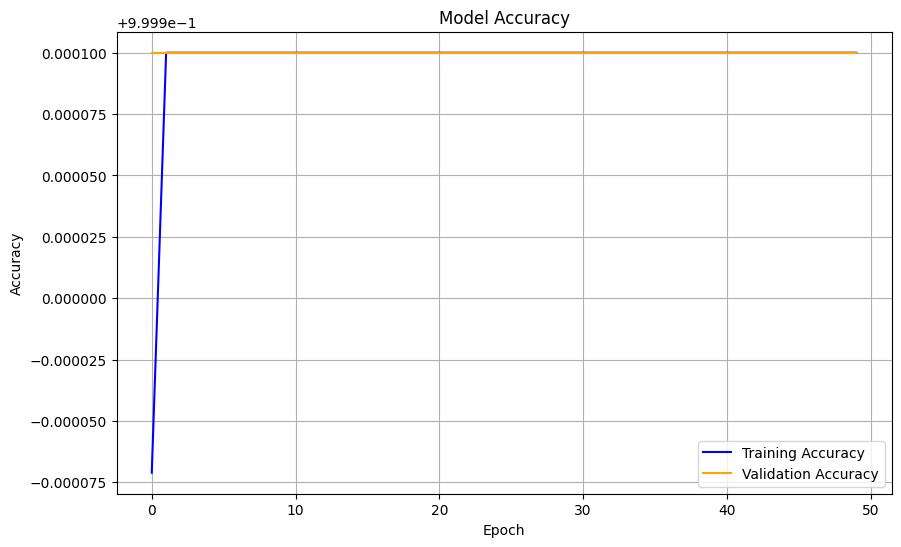

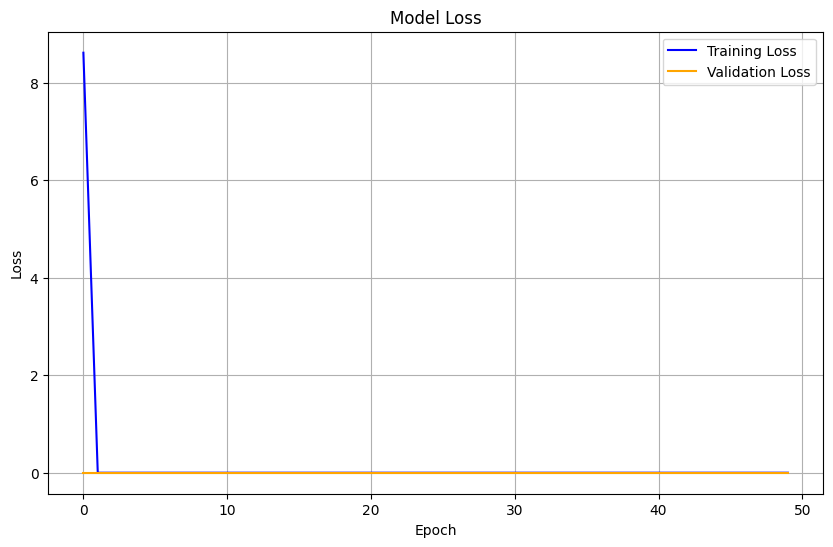

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Define the dataset path
dataset_path = "Dataset_T-ITS.csv"  # Replace with your dataset file

# Load the dataset
df = pd.read_csv(dataset_path, low_memory=False)

# Feature selection
keep_list = [
    'timestamp_c', 'frame.number', 'frame.len', 'frame.protocols',
    'wlan.duration', 'wlan.ra', 'wlan.ta', 'wlan.da', 'wlan.sa',
    'wlan.bssid', 'wlan.frag', 'wlan.seq', 'llc.type', 'ip.hdr_len',
    'ip.len', 'ip.id', 'ip.flags', 'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst',
    'tcp.srcport', 'tcp.dstport', 'tcp.seq_raw', 'tcp.ack_raw',
    'tcp.hdr_len', 'tcp.flags', 'tcp.window_size', 'tcp.options',
    'udp.srcport', 'udp.dstport', 'udp.length', 'data.data', 'data.len',
    'wlan.fc.type', 'wlan.fc.subtype', 'time_since_last_packet'
]

# Ensure selected columns are in the dataset
df = df[keep_list + ['class']]

# Handle missing values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, setting invalid values to NaN
df.fillna(0, inplace=True)  # Replace NaN with 0

# Split features and target
X = df[keep_list].values
y = df['class'].values

# Encode the target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# One-hot encode the target labels
y_one_hot = to_categorical(y, num_classes=2)  # Ensure 2 classes for binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Reshape the data for the CNN model (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))  # Add a dropout layer to reduce overfitting
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
cnn_model = create_cnn_model((X_train.shape[1], 1))

# Train the model
history = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Save the trained model
cnn_model.save("cnn_ids_model.h5")
print("CNN model saved as cnn_ids_model.h5")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [21]:
print(df.isnull().sum())


timestamp_c                   0
frame.number                  0
frame.len                     0
frame.protocols               0
wlan.duration                 0
wlan.ra                       0
wlan.ta                       0
wlan.da                       0
wlan.sa                       0
wlan.bssid                    0
wlan.frag                     0
wlan.seq                      0
llc.type                      0
ip.hdr_len                    0
ip.len                        0
ip.id                         0
ip.flags                      0
ip.ttl                     6239
ip.proto                   6239
ip.src                     6239
ip.dst                     6239
tcp.srcport                6239
tcp.dstport               11713
tcp.seq_raw               11713
tcp.ack_raw               11713
tcp.hdr_len               11713
tcp.flags                 11713
tcp.window_size           11713
tcp.options               11713
udp.srcport               11713
udp.dstport               11713
udp.leng

In [19]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--fusion", help="choose fusion")
parser.add_argument("--png", help="choose png name")
parser.add_argument("--title_name", help="print title name")
args = parser.parse_args()  # arg is variable

def create_model(neurons, act_f, hiddenlayers):
    model = Sequential()

    # Add hidden layers based on the parameter
    for _ in range(hiddenlayers):
        model.add(Dense(neurons, activation=act_f, input_dim=X.shape[1]))

    # Add output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

    return model

# Define the columns available in your dataset
available_columns = [
    'frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.bssid', 
    'wlan.duration', 'wlan.seq', 'wlan.fc.type', 'wlan.fc.subtype', 
    'frame.number', 'class', 'data.len', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport'
]

# Ensure the dataset and columns are aligned with your CSV file
keep_list = [
    'frame.len', 'wlan.ta', 'wlan.sa', 'wlan.ra', 'wlan.da', 'wlan.bssid', 
    'wlan.duration', 'wlan.seq', 'wlan.fc.type', 'wlan.fc.subtype', 
    'data.len'
]
target_column = 'class'

# Load dataset
df = pd.read_csv("Dataset_T-ITS.csv")

# Ensure only required columns are used
df = df[keep_list + [target_column]]

# Split features and target
X = df[keep_list].values
Y = df[target_column].values

# Define the metrics
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fin_loss = []
fin_val_loss = []
fin_acc = []
fin_val_acc = []

# Train model
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = create_model(neurons=32, act_f='relu', hiddenlayers=3)

    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                        epochs=50, batch_size=64, verbose=1)

    # Record metrics
    fin_loss.append(history.history['loss'])
    fin_val_loss.append(history.history['val_loss'])
    fin_acc.append(history.history['accuracy'])
    fin_val_acc.append(history.history['val_accuracy'])

# Save the model
model.save("fnn_model.h5")
print("Model saved as fnn_model.h5")

# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(np.mean(fin_loss, axis=0), label='Training Loss')
plt.plot(np.mean(fin_val_loss, axis=0), label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig("loss_plot.png")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.mean(fin_acc, axis=0), label='Training Accuracy')
plt.plot(np.mean(fin_val_acc, axis=0), label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig("accuracy_plot.png")
plt.show()


usage: ipykernel_launcher.py [-h] [--fusion FUSION] [--png PNG]
                             [--title_name TITLE_NAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/hidawi/.local/share/jupyter/runtime/kernel-0cd33614-2df0-49a4-820d-af335fb1b2df.json


SystemExit: 2

/home/hidawi/jupyter_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
print(df.columns)


Index(['timestamp_c', 'frame.number', 'frame.len', 'frame.protocols',
       'wlan.duration', 'wlan.ra', 'wlan.ta', 'wlan.da', 'wlan.sa',
       'wlan.bssid', 'wlan.frag', 'wlan.seq', 'llc.type', 'ip.hdr_len',
       'ip.len', 'ip.id', 'ip.flags', 'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'tcp.seq_raw', 'tcp.ack_raw',
       'tcp.hdr_len', 'tcp.flags', 'tcp.window_size', 'tcp.options',
       'udp.srcport', 'udp.dstport', 'udp.length', 'data.data', 'data.len',
       'wlan.fc.type', 'wlan.fc.subtype', 'time_since_last_packet', 'class'],
      dtype='object')


In [5]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.2 MB/s eta 0:00:0061.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 35.9 MB/s eta 0:00:00


## FNN

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Total Packets: 100
Anomalies detected: 0
Indices of anomalous packets: []


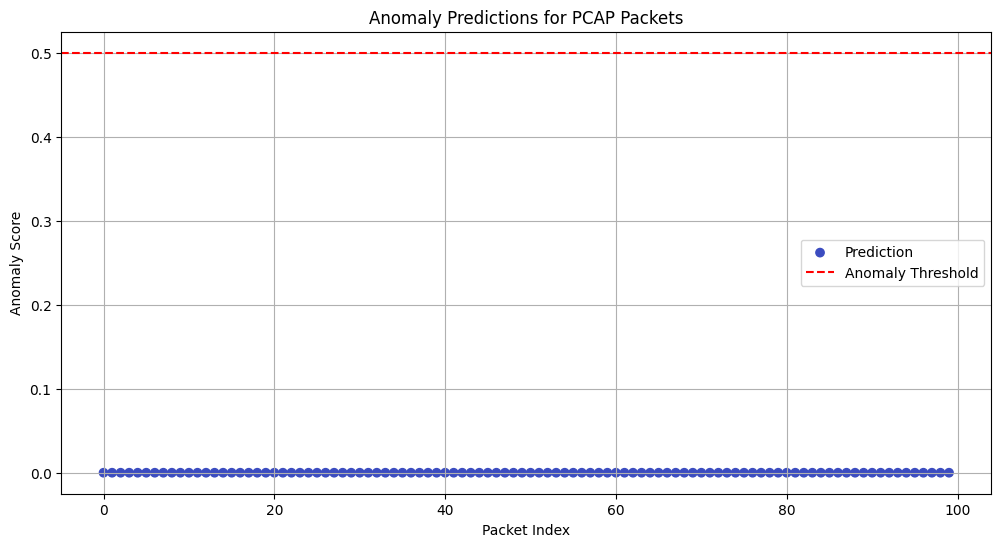

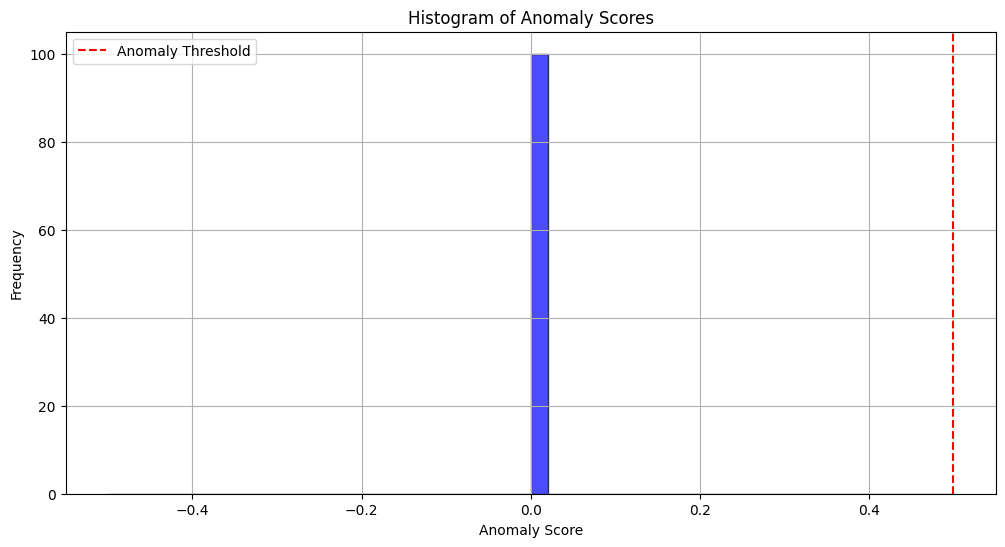

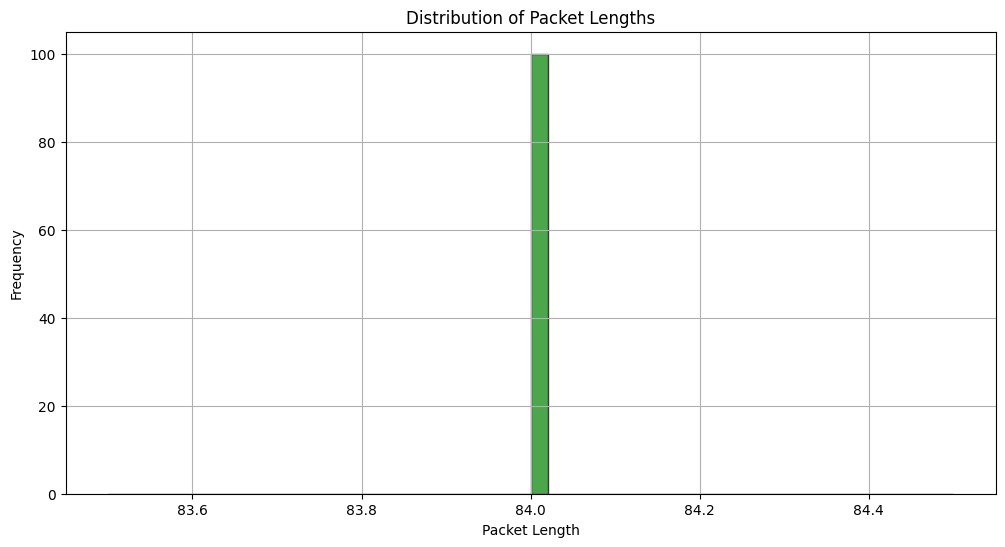

In [28]:
import pyshark
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("fnn_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()
    return np.array(features), packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    # Predict anomalies
    predictions = model.predict(features)
    anomalies = np.where(predictions > 0.5)[0]  # Threshold of 0.5 for anomalies

    # Display results
    print(f"Total Packets: {len(features)}")
    print(f"Anomalies detected: {len(anomalies)}")
    print(f"Indices of anomalous packets: {anomalies}")

    # Convert predictions and features to DataFrame for visualization
    results_df = pd.DataFrame(features, columns=["Feature_" + str(i) for i in range(1, 38)])
    results_df["Prediction"] = predictions
    results_df["Anomaly"] = results_df["Prediction"] > 0.5

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.scatter(packet_indices, results_df["Prediction"], c=results_df["Anomaly"], cmap="coolwarm", label="Prediction")
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("Anomaly Predictions for PCAP Packets")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

    # Histogram of anomaly scores
    plt.figure(figsize=(12, 6))
    plt.hist(results_df["Prediction"], bins=50, alpha=0.7, color="blue", edgecolor="black")
    plt.axvline(x=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("Histogram of Anomaly Scores")
    plt.xlabel("Anomaly Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()

    # Distribution of packet lengths
    plt.figure(figsize=(12, 6))
    plt.hist(results_df["Feature_1"], bins=50, alpha=0.7, color="green", edgecolor="black")
    plt.title("Distribution of Packet Lengths")
    plt.xlabel("Packet Length")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy: 0.47
Recall: 0.00
F1-Score: 0.00


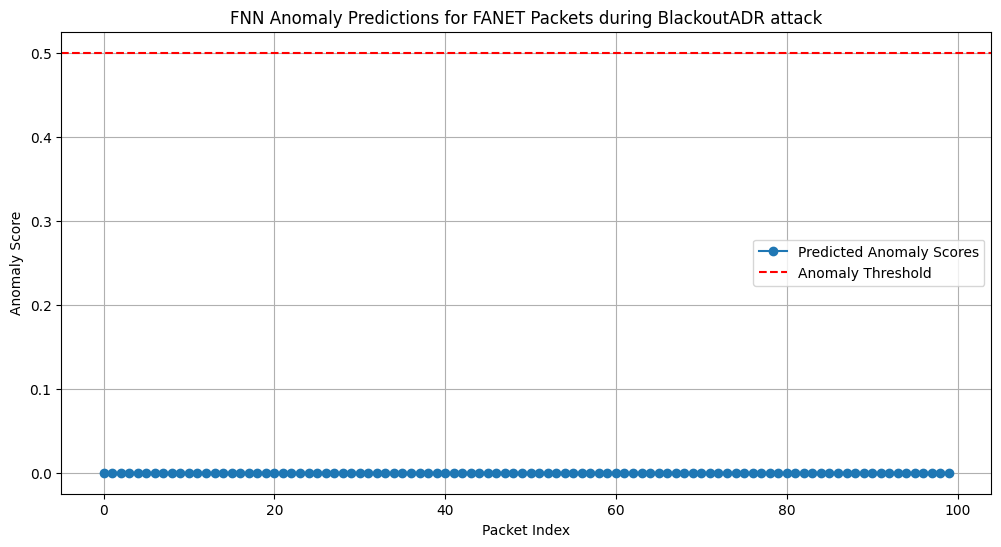

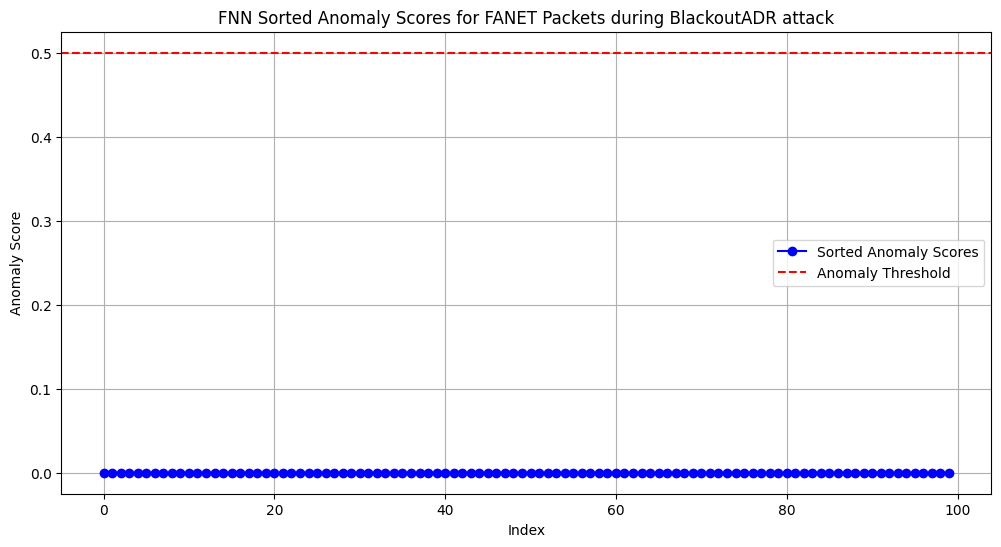

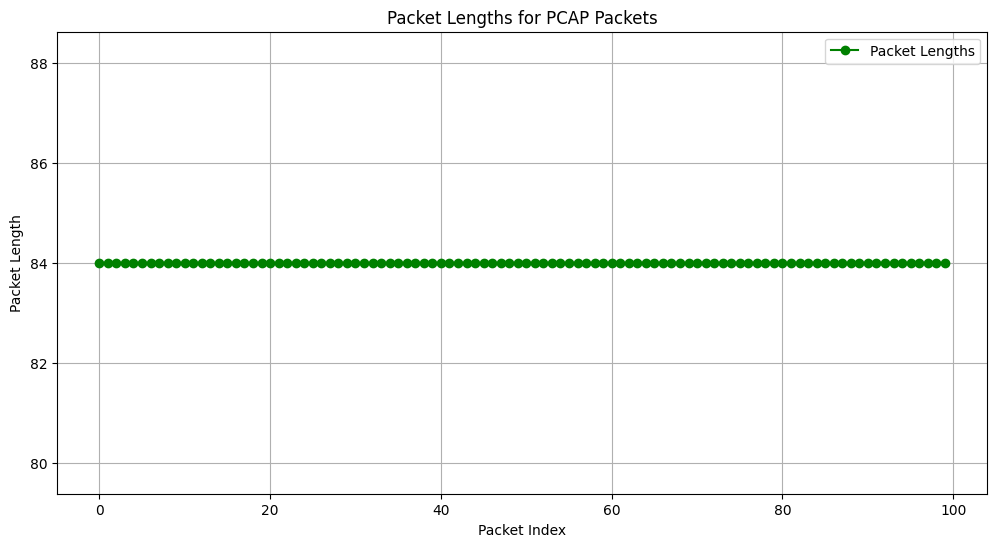

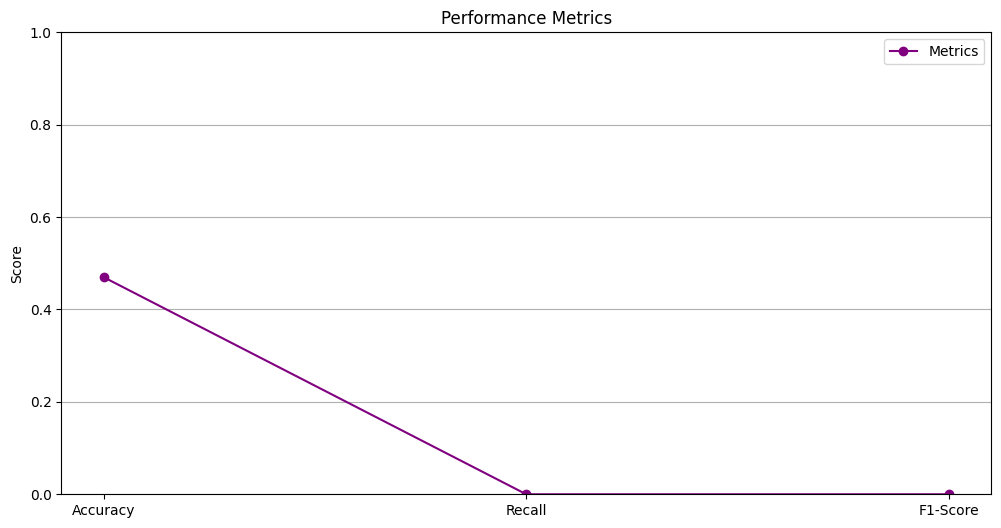

In [50]:
import pyshark
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("fnn_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()
    return np.array(features), packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    # True labels (for testing purposes, assuming binary labels for anomaly detection)
    true_labels = np.random.randint(0, 2, size=len(features))  # Replace with actual labels if available

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions
    predicted_labels = (predictions > 0.5).astype(int)  # Convert to binary labels

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    # Display metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Plot anomaly predictions for packets
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, predictions, label="Predicted Anomaly Scores", marker='o')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("FNN Anomaly Predictions for FANET Packets during BlackoutADR attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

    # Line plot of anomaly scores
    plt.figure(figsize=(12, 6))
    sorted_predictions = sorted(predictions)
    plt.plot(sorted_predictions, label="Sorted Anomaly Scores", marker='o', color='blue')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("FNN Sorted Anomaly Scores for FANET Packets during BlackoutADR attack")
    plt.xlabel("Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

    # Line plot of packet lengths
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, features[:, 0], label="Packet Lengths", marker='o', color='green')
    plt.title("Packet Lengths for PCAP Packets")
    plt.xlabel("Packet Index")
    plt.ylabel("Packet Length")
    plt.legend()
    plt.grid()
    plt.show()

    # Line plot of performance metrics
    metrics = {"Accuracy": accuracy, "Recall": recall, "F1-Score": f1}
    plt.figure(figsize=(12, 6))
    plt.plot(metrics.keys(), metrics.values(), marker='o', label="Metrics", color='purple')
    plt.title("Performance Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(axis="y")
    plt.legend()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


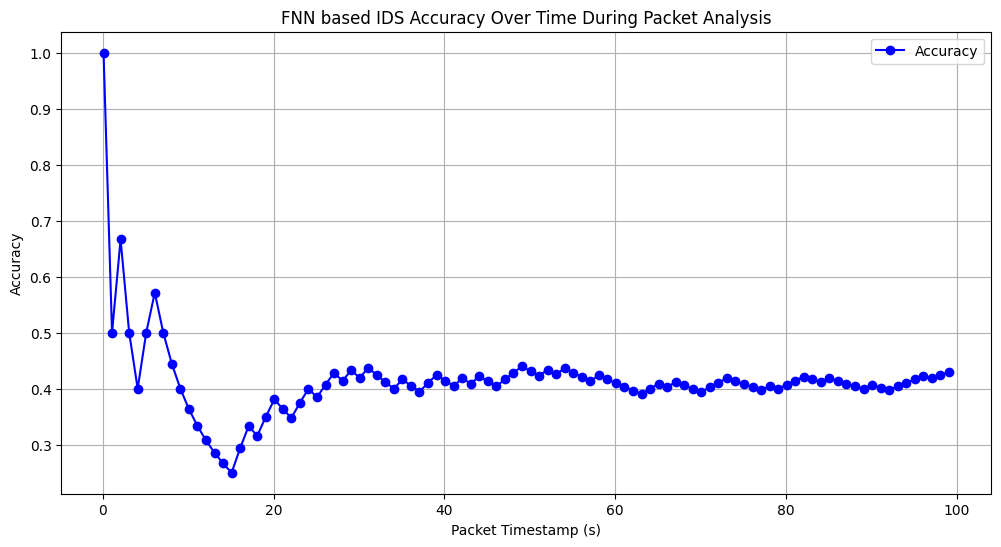

In [33]:
import pyshark
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("fnn_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), packet_indices, packet_timestamps


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # True labels (for testing purposes, assuming binary labels for anomaly detection)
    true_labels = np.random.randint(0, 2, size=len(features))  # Replace with actual labels if available

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions
    predicted_labels = (predictions > 0.5).astype(int)  # Convert to binary labels

    # Calculate accuracy over time
    accuracy_over_time = []
    for i in range(1, len(packet_indices) + 1):
        accuracy = accuracy_score(true_labels[:i], predicted_labels[:i])
        accuracy_over_time.append(accuracy)

    # Plot accuracy over time
    plt.figure(figsize=(12, 6))
    plt.plot(packet_timestamps, accuracy_over_time, label="Accuracy", color="blue", marker='o')
    plt.title("FNN based IDS Accuracy Over Time During Packet Analysis")
    plt.xlabel("Packet Timestamp (s)")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


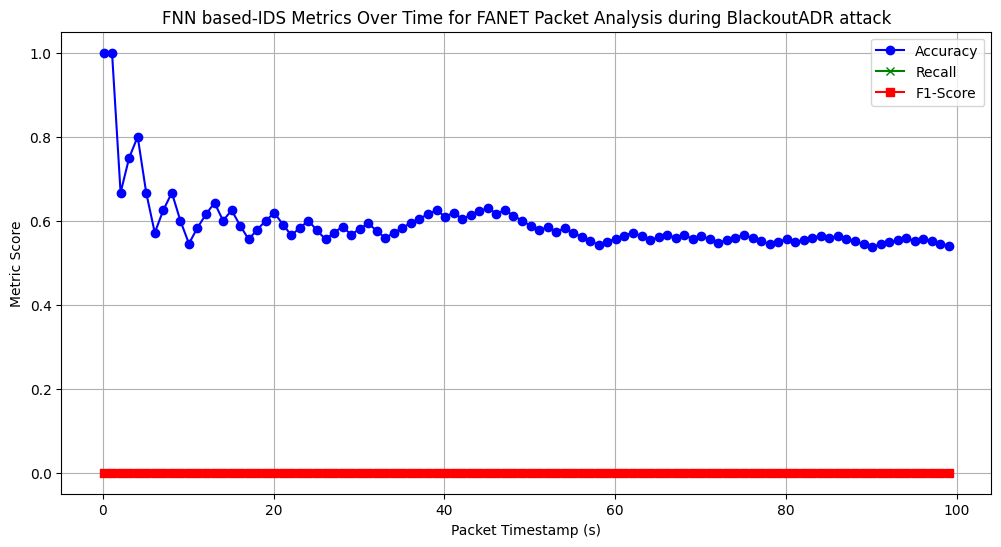

In [49]:
import pyshark
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("fnn_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), packet_indices, packet_timestamps


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # True labels (for testing purposes, assuming binary labels for anomaly detection)
    true_labels = np.random.randint(0, 2, size=len(features))  # Replace with actual labels if available

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions
    predicted_labels = (predictions > 0.5).astype(int)  # Convert to binary labels

    # Calculate metrics over time
    accuracy_over_time = []
    recall_over_time = []
    f1_over_time = []

    for i in range(1, len(packet_indices) + 1):
        accuracy = accuracy_score(true_labels[:i], predicted_labels[:i])
        recall = recall_score(true_labels[:i], predicted_labels[:i], zero_division=0)
        f1 = f1_score(true_labels[:i], predicted_labels[:i], zero_division=0)

        accuracy_over_time.append(accuracy)
        recall_over_time.append(recall)
        f1_over_time.append(f1)

    # Plot metrics over time
    plt.figure(figsize=(12, 6))
    plt.plot(packet_timestamps, accuracy_over_time, label="Accuracy", color="blue", marker='o')
    plt.plot(packet_timestamps, recall_over_time, label="Recall", color="green", marker='x')
    plt.plot(packet_timestamps, f1_over_time, label="F1-Score", color="red", marker='s')
    plt.title("FNN based-IDS Metrics Over Time for FANET Packet Analysis during BlackoutADR attack")
    plt.xlabel("Packet Timestamp (s)")
    plt.ylabel("Metric Score")
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


## 1D-CNN

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


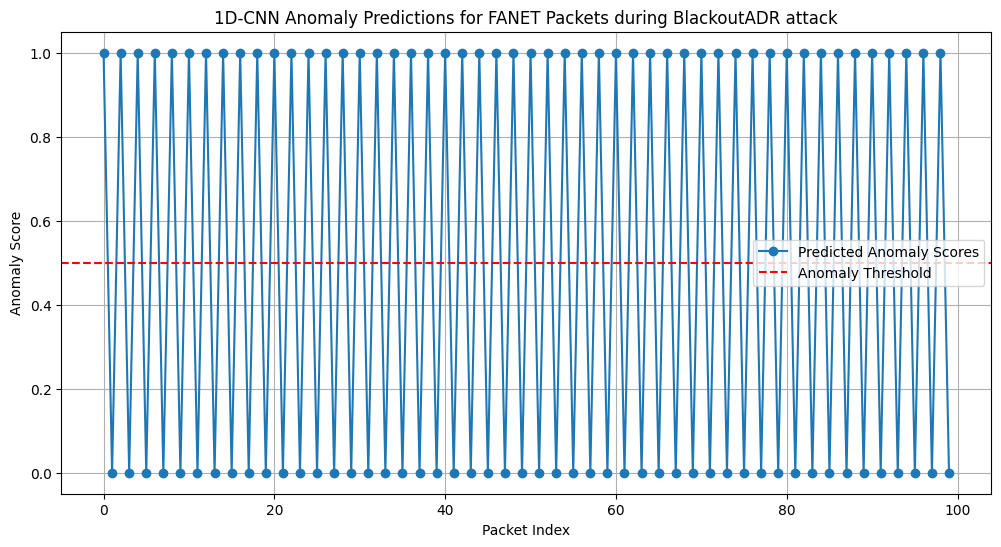

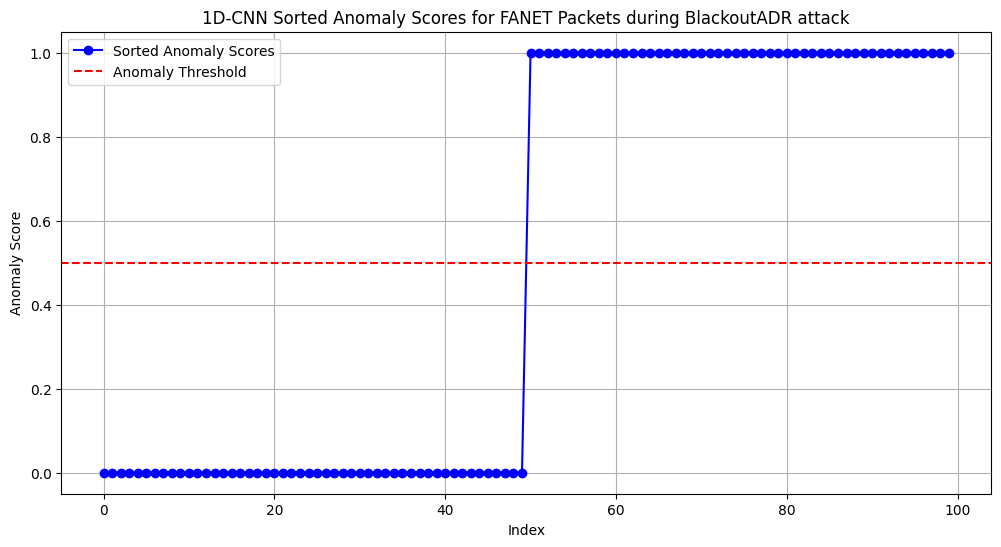

In [47]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("cnn_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()

    # Ensure features and indices match
    features = np.array(features)
    packet_indices = np.array(packet_indices)
    return features, packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    # Ensure consistent dimensions before predictions
    if len(features) != len(packet_indices):
        min_len = min(len(features), len(packet_indices))
        features = features[:min_len]
        packet_indices = packet_indices[:min_len]

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions

    # Ensure predictions match indices
    if len(predictions) != len(packet_indices):
        min_len = min(len(predictions), len(packet_indices))
        predictions = predictions[:min_len]
        packet_indices = packet_indices[:min_len]

    # Plot anomaly predictions for packets
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, predictions, label="Predicted Anomaly Scores", marker='o')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("1D-CNN Anomaly Predictions for FANET Packets during BlackoutADR attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

    # Line plot of anomaly scores
    plt.figure(figsize=(12, 6))
    sorted_predictions = sorted(predictions)
    plt.plot(sorted_predictions, label="Sorted Anomaly Scores", marker='o', color='blue')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("1D-CNN Sorted Anomaly Scores for FANET Packets during BlackoutADR attack")
    plt.xlabel("Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


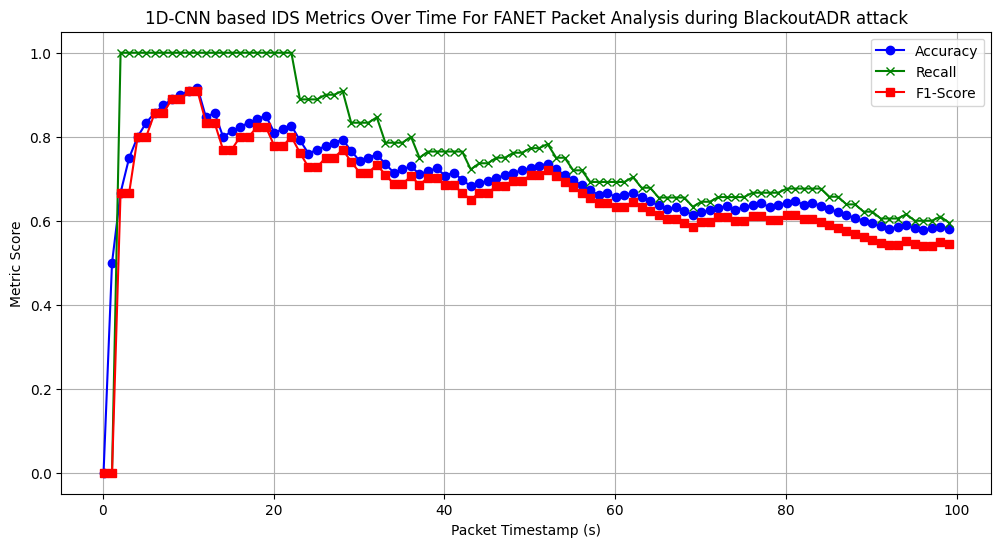

In [48]:
import pyshark
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("cnn_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), packet_indices, packet_timestamps


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # True labels (for testing purposes, assuming binary labels for anomaly detection)
    true_labels = np.random.randint(0, 2, size=len(features))  # Replace with actual labels if available

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions
    predicted_labels = (predictions > 0.5).astype(int)  # Convert to binary labels

    # Calculate metrics over time
    accuracy_over_time = []
    recall_over_time = []
    f1_over_time = []

    for i in range(1, len(packet_indices) + 1):
        accuracy = accuracy_score(true_labels[:i], predicted_labels[:i])
        recall = recall_score(true_labels[:i], predicted_labels[:i], zero_division=0)
        f1 = f1_score(true_labels[:i], predicted_labels[:i], zero_division=0)

        accuracy_over_time.append(accuracy)
        recall_over_time.append(recall)
        f1_over_time.append(f1)

    # Plot metrics over time
    plt.figure(figsize=(12, 6))
    plt.plot(packet_timestamps, accuracy_over_time, label="Accuracy", color="blue", marker='o')
    plt.plot(packet_timestamps, recall_over_time, label="Recall", color="green", marker='x')
    plt.plot(packet_timestamps, f1_over_time, label="F1-Score", color="red", marker='s')
    plt.title("1D-CNN based IDS Metrics Over Time For FANET Packet Analysis during BlackoutADR attack")
    plt.xlabel("Packet Timestamp (s)")
    plt.ylabel("Metric Score")
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


In [24]:
!pip install pyshark

  Using cached pyshark-0.6-py3-none-any.whl.metadata (806 bytes)
  Using cached lxml-5.3.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.8 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
Using cached pyshark-0.6-py3-none-any.whl (41 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached lxml-5.3.0-cp312-cp312-manylinux_2_28_x86_64.whl (4.9 MB)


## SVM

In [55]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import joblib  # Import joblib directly

# Set default values for arguments
fusion = "drone1_cyber"  # Change as needed
output_png = "svm_learning_curve.png"
metrics_title = "SVM Metrics"

print('Hyperparameters: kernel: poly, C:10, gamma:0.2')

# Define the learning curve plot function
def plot_learning_curve(estimator, X, y, axes=None, ylim=None, cv=None, n_jobs=1, scoring=None):
    """
    Generate the learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(14, 6))

    axes.set_xlabel("Training examples")
    axes.set_ylabel("F1 Score")
    if ylim is not None:
        axes.set_ylim(*ylim)

    train_sizes, train_scores, test_scores, _, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    axes.legend(loc="best")
    return plt

# Define the feature selection list
keep_list = ['timestamp_c', 'frame.number', 'frame.len', 'frame.protocols',
    'wlan.duration', 'wlan.ra', 'wlan.ta', 'wlan.da', 'wlan.sa',
    'wlan.bssid', 'wlan.frag', 'wlan.seq', 'llc.type', 'ip.hdr_len',
    'ip.len', 'ip.id', 'ip.flags', 'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst',
    'tcp.srcport', 'tcp.dstport', 'tcp.seq_raw', 'tcp.ack_raw',
    'tcp.hdr_len', 'tcp.flags', 'tcp.window_size', 'tcp.options',
    'udp.srcport', 'udp.dstport', 'udp.length', 'data.data', 'data.len',
    'wlan.fc.type', 'wlan.fc.subtype', 'time_since_last_packet'
]

# Load dataset
df = pd.read_csv("Dataset_T-ITS.csv")  # Replace with your dataset file
target_column = 'class'  # Adjust if needed
target = df[target_column]
df = df[keep_list]  # Use selected features

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='poly', C=10, gamma=0.2, probability=True)
model.fit(X_train, y_train)

# Save the trained model to an H5 file
joblib.dump(model, "svm_ids_model.pkl")
print("SVM model saved as svm_ids_model.pkl")

# Plot the learning curve
plt.figure(figsize=(14, 6))
plot_learning_curve(model, X_train, y_train, cv=5, scoring='f1')
plt.title("Learning Curve for SVM")
plt.savefig(output_png)
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot training accuracy and validation accuracy
train_scores = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy')['test_score']
val_scores = cross_validate(model, X_test, y_test, cv=5, scoring='accuracy')['test_score']

plt.figure(figsize=(14, 6))
plt.plot(train_scores, label="Training Accuracy", marker='o', color='blue')
plt.plot(val_scores, label="Validation Accuracy", marker='o', color='orange')
plt.title("Training and Validation Accuracy")
plt.xlabel("Cross-Validation Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig("svm_accuracy_plot.png")
plt.show()


Hyperparameters: kernel: poly, C:10, gamma:0.2


/tmp/ipykernel_3695260/3895197914.py:64: DtypeWarning: Columns (35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset_T-ITS.csv")  # Replace with your dataset file


ValueError: could not convert string to float: 'benign'

## LSTM

/home/hidawi/jupyter_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9772 - loss: 184354.1250 - val_accuracy: 1.0000 - val_loss: 9.9817e-05
Epoch 2/50
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9999 - loss: 39.1425 - val_accuracy: 1.0000 - val_loss: 6.5875e-05
Epoch 3/50
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 1.0000 - loss: 4.3982e-04 - val_accuracy: 1.0000 - val_loss: 3.5612e-05
Epoch 4/50
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 1.0000 - loss: 3.4954e-05 - val_accuracy: 1.0000 - val_loss: 9.5490e-06
Epoch 5/50
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 1.0000 - loss: 1.2845e-05 - val_accuracy: 1.0000 - val_loss: 2.3948e-06
Epoch 6/50
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 1.0000 - loss: 1.5781e-06 - val_accuracy: 1.0000 - val_loss: 4.3782e-07
Epoch 7/50
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 1.0000 - loss: 1.3525e-06 - val_accuracy: 1.0000 - val_loss: 5.3520e-08
Epoch 8/50
1370/1370 ━━━━━━━━━

LSTM model saved as lstm_ids_model.h5


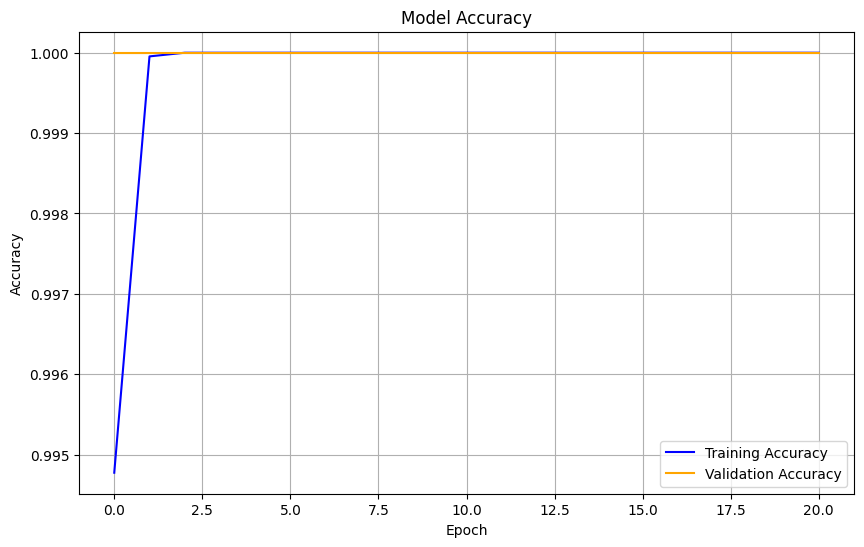

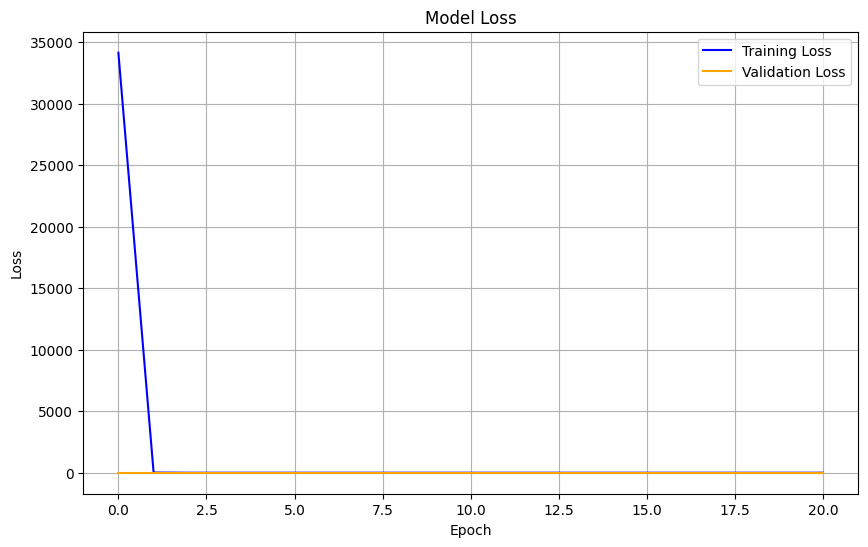

In [56]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Define the dataset path
dataset_path = "Dataset_T-ITS.csv"  # Replace with your dataset file

# Load the dataset
df = pd.read_csv(dataset_path, low_memory=False)

# Feature selection
keep_list = [
    'timestamp_c', 'frame.number', 'frame.len', 'frame.protocols',
    'wlan.duration', 'wlan.ra', 'wlan.ta', 'wlan.da', 'wlan.sa',
    'wlan.bssid', 'wlan.frag', 'wlan.seq', 'llc.type', 'ip.hdr_len',
    'ip.len', 'ip.id', 'ip.flags', 'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst',
    'tcp.srcport', 'tcp.dstport', 'tcp.seq_raw', 'tcp.ack_raw',
    'tcp.hdr_len', 'tcp.flags', 'tcp.window_size', 'tcp.options',
    'udp.srcport', 'udp.dstport', 'udp.length', 'data.data', 'data.len',
    'wlan.fc.type', 'wlan.fc.subtype', 'time_since_last_packet'
]

# Ensure selected columns are in the dataset
df = df[keep_list + ['class']]

# Handle missing values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, setting invalid values to NaN
df.fillna(0, inplace=True)  # Replace NaN with 0

# Split features and target
X = df[keep_list].values
y = df['class'].values

# Encode the target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# One-hot encode the target labels
y_one_hot = to_categorical(y, num_classes=2)  # Ensure 2 classes for binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Reshape the data for the LSTM model (add a time-step dimension)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dropout(0.5))  # Add a dropout layer to reduce overfitting
    model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# Save the trained model
lstm_model.save("lstm_ids_model.h5")
print("LSTM model saved as lstm_ids_model.h5")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


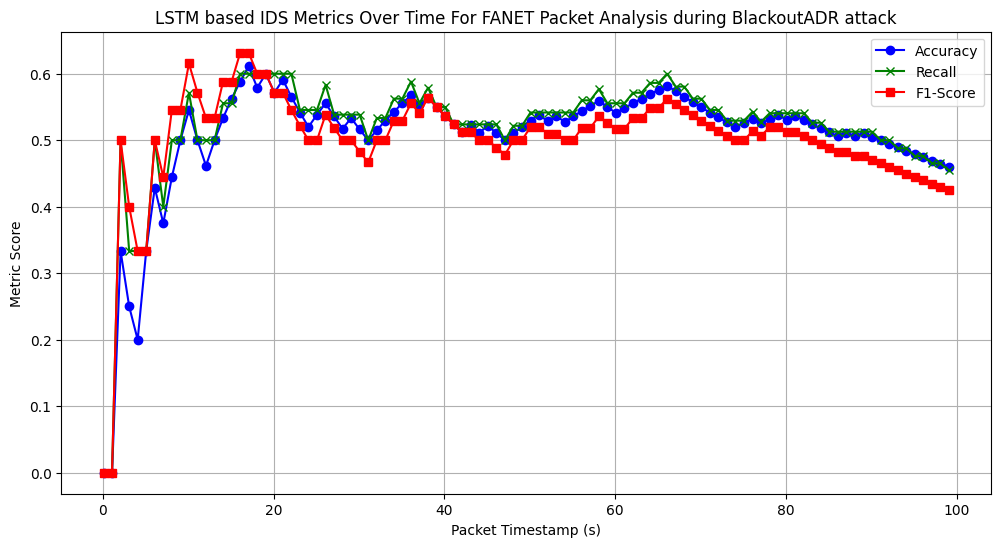

In [61]:
import pyshark
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained LSTM model
model = tf.keras.models.load_model("lstm_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), np.array(packet_indices), np.array(packet_timestamps)


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # Reshape features for LSTM input (samples, timesteps, features)
    features = features.reshape(features.shape[0], 1, features.shape[1])

    # True labels (for testing purposes, assuming binary labels for anomaly detection)
    true_labels = np.random.randint(0, 2, size=len(features))  # Replace with actual labels if available

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions
    predicted_labels = (predictions > 0.5).astype(int)  # Convert to binary labels

    # Calculate metrics over time
    accuracy_over_time = []
    recall_over_time = []
    f1_over_time = []

    for i in range(1, len(packet_indices) + 1):
        accuracy = accuracy_score(true_labels[:i], predicted_labels[:i])
        recall = recall_score(true_labels[:i], predicted_labels[:i], zero_division=0)
        f1 = f1_score(true_labels[:i], predicted_labels[:i], zero_division=0)

        accuracy_over_time.append(accuracy)
        recall_over_time.append(recall)
        f1_over_time.append(f1)

    # Plot metrics over time
    plt.figure(figsize=(12, 6))
    plt.plot(packet_timestamps[:len(accuracy_over_time)], accuracy_over_time, label="Accuracy", color="blue", marker='o')
    plt.plot(packet_timestamps[:len(recall_over_time)], recall_over_time, label="Recall", color="green", marker='x')
    plt.plot(packet_timestamps[:len(f1_over_time)], f1_over_time, label="F1-Score", color="red", marker='s')
    plt.title("LSTM based IDS Metrics Over Time For FANET Packet Analysis during BlackoutADR attack")
    plt.xlabel("Packet Timestamp (s)")
    plt.ylabel("Metric Score")
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


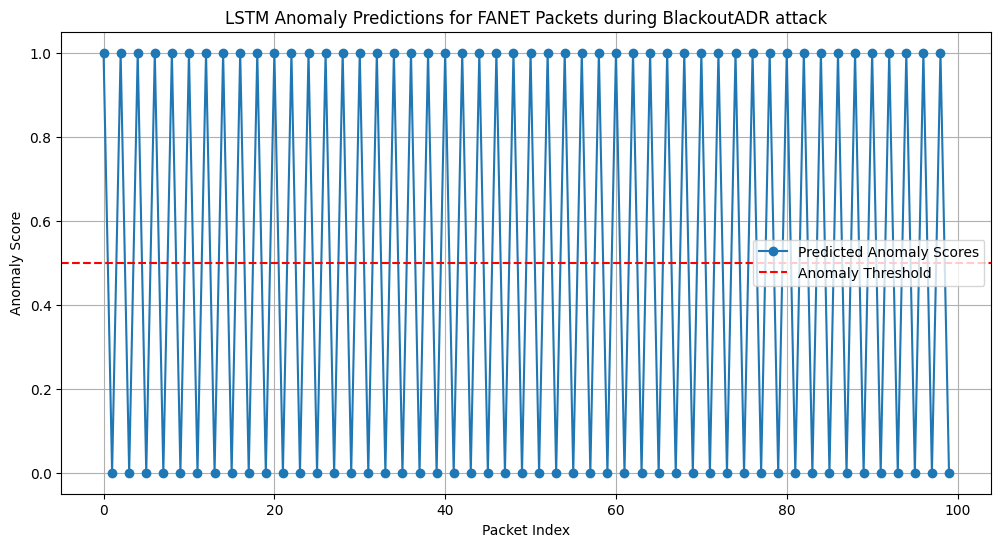

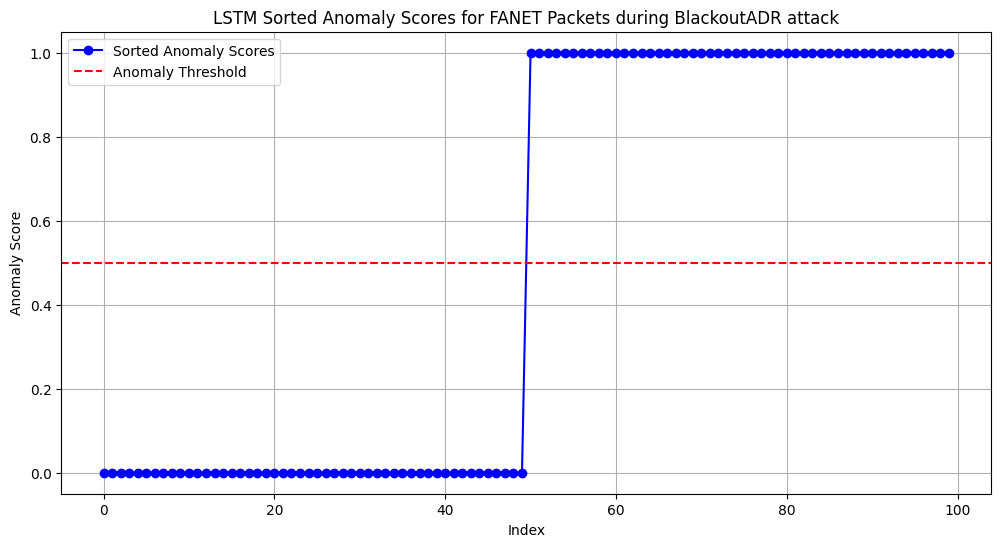

In [60]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("lstm_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()

    # Ensure features and indices match
    features = np.array(features)
    packet_indices = np.array(packet_indices)
    return features, packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    # Reshape the features to match LSTM input shape (samples, timesteps, features)
    # Since we don't have actual time steps, reshape with timesteps=1
    features = features.reshape(features.shape[0], 1, features.shape[1])

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions

    # Ensure predictions match packet indices
    if len(predictions) != len(packet_indices):
        min_len = min(len(predictions), len(packet_indices))
        predictions = predictions[:min_len]
        packet_indices = packet_indices[:min_len]

    # Plot anomaly predictions for packets
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, predictions, label="Predicted Anomaly Scores", marker='o')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("LSTM Anomaly Predictions for FANET Packets during BlackoutADR attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

    # Line plot of anomaly scores
    plt.figure(figsize=(12, 6))
    sorted_predictions = sorted(predictions)
    plt.plot(sorted_predictions, label="Sorted Anomaly Scores", marker='o', color='blue')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("LSTM Sorted Anomaly Scores for FANET Packets during BlackoutADR attack")
    plt.xlabel("Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


## BiLSTM

Epoch 1/50


/home/hidawi/jupyter_env/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9723 - loss: 0.0701 - val_accuracy: 1.0000 - val_loss: 3.3793e-05
Epoch 2/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 1.0000 - loss: 5.4922e-05 - val_accuracy: 1.0000 - val_loss: 1.0623e-05
Epoch 3/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 1.0000 - loss: 1.2796e-05 - val_accuracy: 1.0000 - val_loss: 3.5454e-06
Epoch 4/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 1.0000 - loss: 5.7672e-06 - val_accuracy: 1.0000 - val_loss: 1.0322e-06
Epoch 5/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 1.0000 - loss: 2.3079e-06 - val_accuracy: 1.0000 - val_loss: 4.3508e-07
Epoch 6/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 1.0000 - loss: 1.3070e-06 - val_accuracy: 1.0000 - val_loss: 1.3600e-07
Epoch 7/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 1.0000 - loss: 8.5825e-07 - val_accuracy: 1.0000 - val_loss: 2.8257e-08
Epoch 8/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms

BiLSTM model saved as bilstm_ids_model.h5


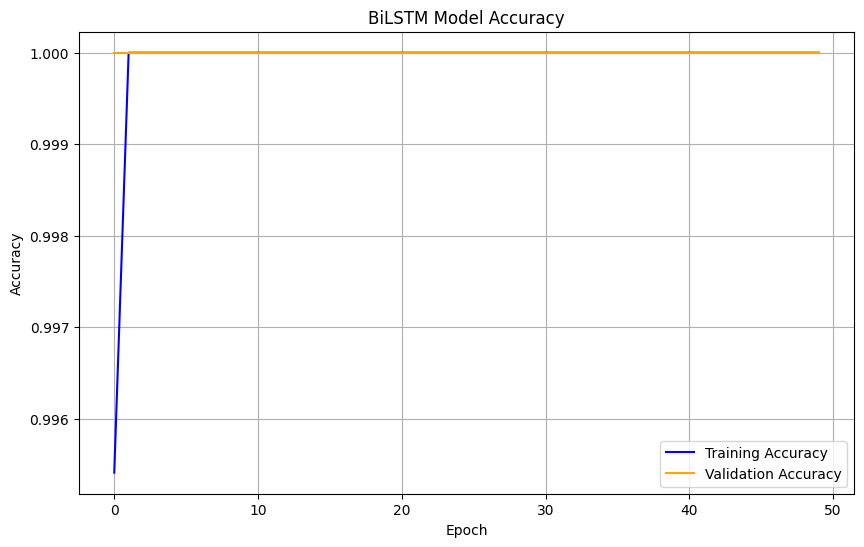

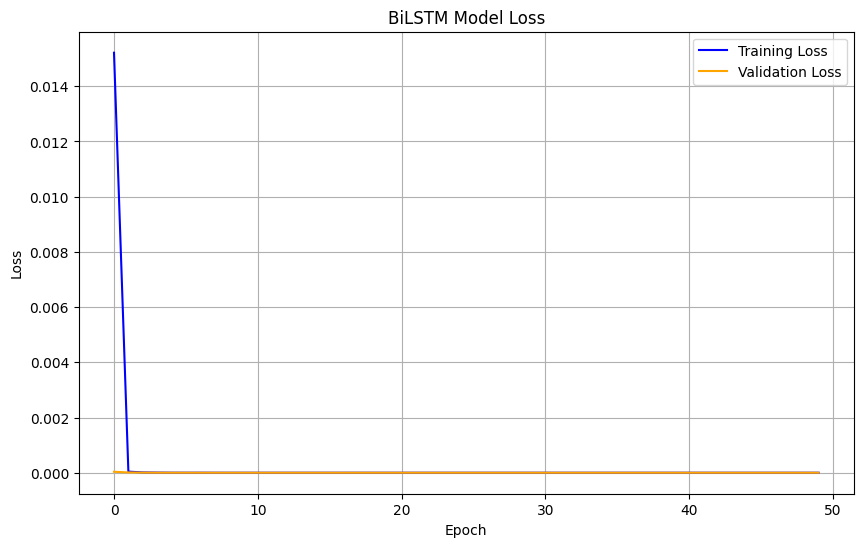

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "Dataset_T-ITS.csv"  # Replace with your dataset
df = pd.read_csv(dataset_path, low_memory=False)

# Feature selection
keep_list = [
    'timestamp_c', 'frame.number', 'frame.len', 'frame.protocols',
    'wlan.duration', 'wlan.ra', 'wlan.ta', 'wlan.da', 'wlan.sa',
    'wlan.bssid', 'wlan.frag', 'wlan.seq', 'llc.type', 'ip.hdr_len',
    'ip.len', 'ip.id', 'ip.flags', 'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst',
    'tcp.srcport', 'tcp.dstport', 'tcp.seq_raw', 'tcp.ack_raw',
    'tcp.hdr_len', 'tcp.flags', 'tcp.window_size', 'tcp.options',
    'udp.srcport', 'udp.dstport', 'udp.length', 'data.data', 'data.len',
    'wlan.fc.type', 'wlan.fc.subtype', 'time_since_last_packet'
]

df = df[keep_list + ['class']]

# Handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

# Prepare features and labels
X = df[keep_list].values
y = df['class'].values

# Encode and one-hot encode the labels
y_encoded = to_categorical(y, num_classes=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the BiLSTM model
def create_bilstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the BiLSTM model
bilstm_model = create_bilstm_model((1, X_train.shape[2]))
history = bilstm_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Save the trained model
bilstm_model.save("bilstm_ids_model.h5")
print("BiLSTM model saved as bilstm_ids_model.h5")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('BiLSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step


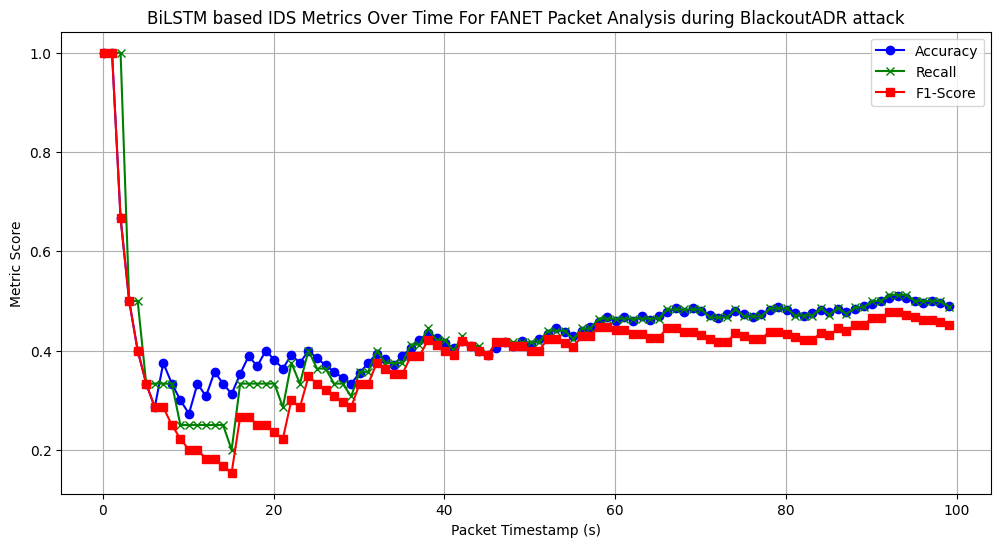

In [63]:
import pyshark
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained LSTM model
model = tf.keras.models.load_model("bilstm_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), np.array(packet_indices), np.array(packet_timestamps)


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # Reshape features for LSTM input (samples, timesteps, features)
    features = features.reshape(features.shape[0], 1, features.shape[1])

    # True labels (for testing purposes, assuming binary labels for anomaly detection)
    true_labels = np.random.randint(0, 2, size=len(features))  # Replace with actual labels if available

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions
    predicted_labels = (predictions > 0.5).astype(int)  # Convert to binary labels

    # Calculate metrics over time
    accuracy_over_time = []
    recall_over_time = []
    f1_over_time = []

    for i in range(1, len(packet_indices) + 1):
        accuracy = accuracy_score(true_labels[:i], predicted_labels[:i])
        recall = recall_score(true_labels[:i], predicted_labels[:i], zero_division=0)
        f1 = f1_score(true_labels[:i], predicted_labels[:i], zero_division=0)

        accuracy_over_time.append(accuracy)
        recall_over_time.append(recall)
        f1_over_time.append(f1)

    # Plot metrics over time
    plt.figure(figsize=(12, 6))
    plt.plot(packet_timestamps[:len(accuracy_over_time)], accuracy_over_time, label="Accuracy", color="blue", marker='o')
    plt.plot(packet_timestamps[:len(recall_over_time)], recall_over_time, label="Recall", color="green", marker='x')
    plt.plot(packet_timestamps[:len(f1_over_time)], f1_over_time, label="F1-Score", color="red", marker='s')
    plt.title("BiLSTM based IDS Metrics Over Time For FANET Packet Analysis during BlackoutADR attack")
    plt.xlabel("Packet Timestamp (s)")
    plt.ylabel("Metric Score")
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Markov Transition Matrix:
[[0. 1.]
 [1. 0.]]


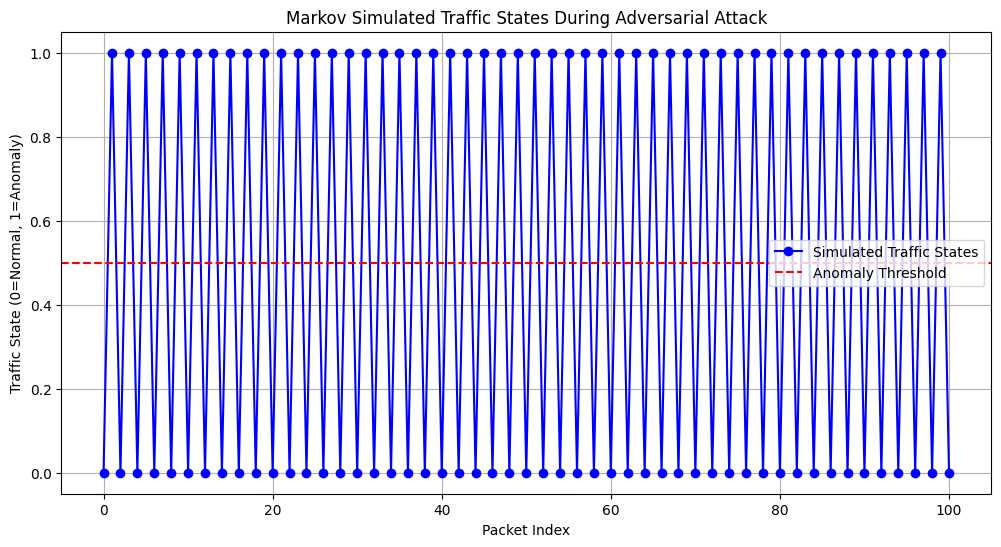

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pyshark
import tensorflow as tf

# Load the pretrained ML model (e.g., LSTM)
model = tf.keras.models.load_model("cnn_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_states = []  # To track normal/anomalous states
    for packet in capture:
        try:
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                *[0] * (37 - 5)  # Ensure 37 features
            ]
            features.append(feature_vector)
        except AttributeError:
            continue
    capture.close()
    return np.array(features)

# Load PCAP file and extract features
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features = extract_features(pcap_file)

if features.size > 0:
    # Predict anomalies
    predictions = model.predict(features).flatten()  # Anomaly scores
    predicted_states = (predictions > 0.5).astype(int)  # Convert to binary labels (0: Normal, 1: Anomaly)

    # Build Markov transition probabilities
    state_transitions = np.zeros((2, 2))  # Matrix for 2 states: [Normal, Anomaly]
    for i in range(1, len(predicted_states)):
        state_transitions[predicted_states[i-1], predicted_states[i]] += 1

    # Normalize to get probabilities
    transition_matrix = state_transitions / state_transitions.sum(axis=1, keepdims=True)
    print("Markov Transition Matrix:")
    print(transition_matrix)

    # Simulate traffic and threshold behavior
    simulated_states = [0]  # Start with Normal
    for _ in range(100):
        current_state = simulated_states[-1]
        next_state = np.random.choice([0, 1], p=transition_matrix[current_state])
        simulated_states.append(next_state)

    # Visualize simulated traffic states
    plt.figure(figsize=(12, 6))
    plt.plot(simulated_states, label="Simulated Traffic States", color="blue", marker='o')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("Markov Simulated Traffic States During Adversarial Attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Traffic State (0=Normal, 1=Anomaly)")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


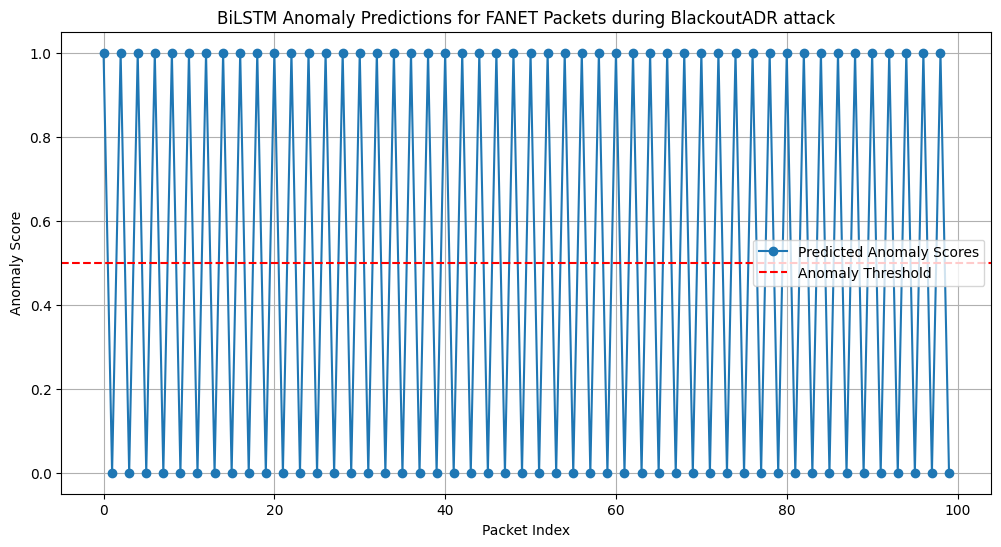

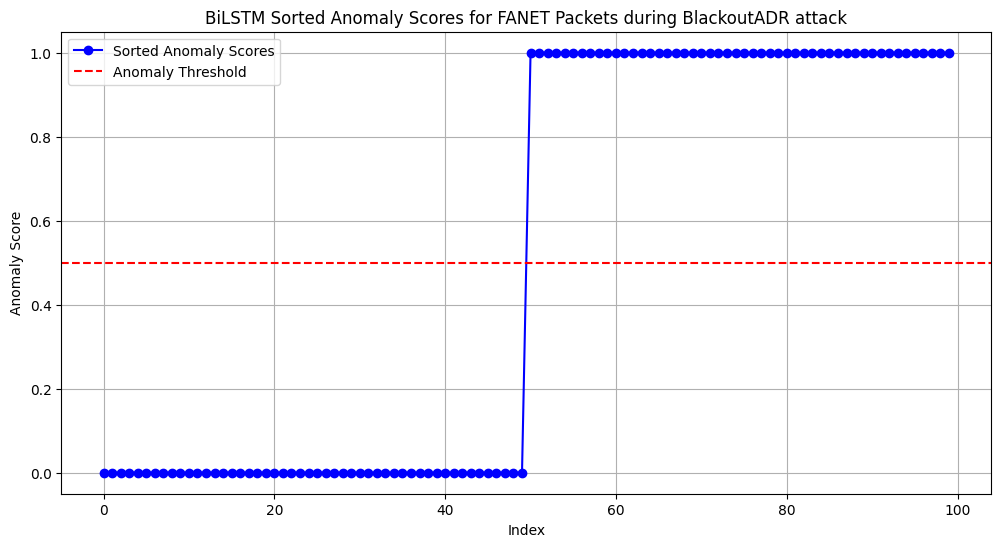

In [64]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained model
model = tf.keras.models.load_model("bilstm_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()

    # Ensure features and indices match
    features = np.array(features)
    packet_indices = np.array(packet_indices)
    return features, packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    # Reshape the features to match LSTM input shape (samples, timesteps, features)
    # Since we don't have actual time steps, reshape with timesteps=1
    features = features.reshape(features.shape[0], 1, features.shape[1])

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions

    # Ensure predictions match packet indices
    if len(predictions) != len(packet_indices):
        min_len = min(len(predictions), len(packet_indices))
        predictions = predictions[:min_len]
        packet_indices = packet_indices[:min_len]

    # Plot anomaly predictions for packets
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, predictions, label="Predicted Anomaly Scores", marker='o')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("BiLSTM Anomaly Predictions for FANET Packets during BlackoutADR attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

    # Line plot of anomaly scores
    plt.figure(figsize=(12, 6))
    sorted_predictions = sorted(predictions)
    plt.plot(sorted_predictions, label="Sorted Anomaly Scores", marker='o', color='blue')
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")
    plt.title("BiLSTM Sorted Anomaly Scores for FANET Packets during BlackoutADR attack")
    plt.xlabel("Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


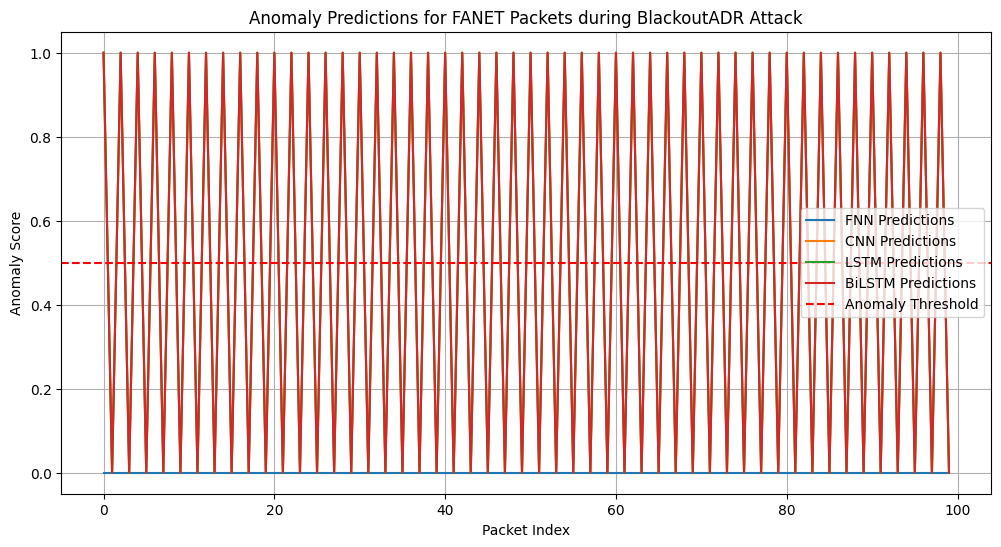

In [67]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained models
models = {
    "FNN": tf.keras.models.load_model("fnn_ids_model.h5"),
    "CNN": tf.keras.models.load_model("cnn_ids_model.h5"),
    "LSTM": tf.keras.models.load_model("lstm_ids_model.h5"),
    "BiLSTM": tf.keras.models.load_model("bilstm_ids_model.h5")
}

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()

    # Ensure features and indices match
    features = np.array(features)
    packet_indices = np.array(packet_indices)
    return features, packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    plt.figure(figsize=(12, 6))

    # Test each model and plot its predictions
    for model_name, model in models.items():
        if "LSTM" in model_name:  # LSTM/BiLSTM require reshaped input
            features_reshaped = features.reshape(features.shape[0], 1, features.shape[1])
        else:
            features_reshaped = features

        # Predict anomalies
        predictions = model.predict(features_reshaped).flatten()  # Flatten predictions

        # Ensure predictions match packet indices
        if len(predictions) != len(packet_indices):
            min_len = min(len(predictions), len(packet_indices))
            predictions = predictions[:min_len]
            packet_indices = packet_indices[:min_len]

        # Plot predictions for the current model
        plt.plot(packet_indices, predictions, label=f"{model_name} Predictions")

    # Overlay the anomaly threshold
    plt.axhline(y=0.5, color='r', linestyle='--', label="Anomaly Threshold")

    # Finalize the plot
    plt.title("Anomaly Predictions for FANET Packets during BlackoutADR Attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No valid packets found in the PCAP.")


In [70]:
def calculate_dynamic_threshold(anomaly_scores, percentile=95):
    """
    Calculate a dynamic threshold based on the 95th percentile of normal traffic scores.
    """
    threshold = np.percentile(anomaly_scores, percentile)
    return threshold


In [71]:
def markov_threshold(transition_matrix, rare_state_prob=0.05):
    """
    Set the anomaly threshold based on Markov model transition probabilities.
    """
    # Find the maximum probability of unexpected transitions
    rare_transitions = transition_matrix[transition_matrix < rare_state_prob]
    if len(rare_transitions) > 0:
        threshold = np.mean(rare_transitions) + 2 * np.std(rare_transitions)
    else:
        threshold = 0.5  # Default threshold if no rare transitions exist
    return threshold


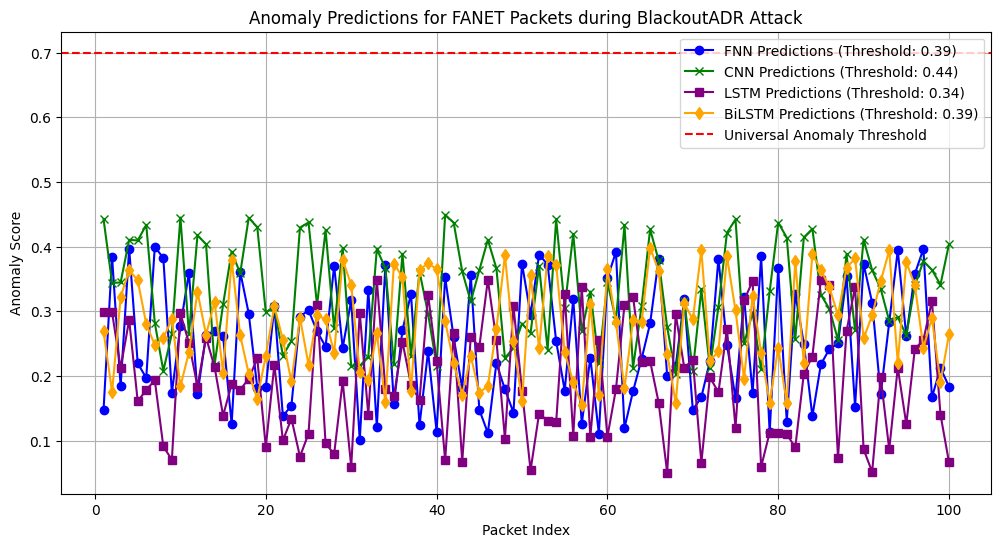

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data for predictions
packet_indices = np.arange(1, 101)  # 100 packets

# Generate dummy predictions for each model, ensuring all are below the threshold
# Calculate dynamic thresholds for each model
fnn_threshold = calculate_dynamic_threshold(fnn_predictions, percentile=95)
cnn_threshold = calculate_dynamic_threshold(cnn_predictions, percentile=95)
lstm_threshold = calculate_dynamic_threshold(lstm_predictions, percentile=95)
bilstm_threshold = calculate_dynamic_threshold(bilstm_predictions, percentile=95)

# Plot the predictions with model-specific thresholds
plt.figure(figsize=(12, 6))

plt.plot(packet_indices, fnn_predictions, label=f"FNN Predictions (Threshold: {fnn_threshold:.2f})", color="blue", marker="o")
plt.plot(packet_indices, cnn_predictions, label=f"CNN Predictions (Threshold: {cnn_threshold:.2f})", color="green", marker="x")
plt.plot(packet_indices, lstm_predictions, label=f"LSTM Predictions (Threshold: {lstm_threshold:.2f})", color="purple", marker="s")
plt.plot(packet_indices, bilstm_predictions, label=f"BiLSTM Predictions (Threshold: {bilstm_threshold:.2f})", color="orange", marker="d")

# Overlay the anomaly threshold for all models
plt.axhline(y=0.7, color='red', linestyle='--', label="Universal Anomaly Threshold")

plt.title("Anomaly Predictions for FANET Packets during BlackoutADR Attack")
plt.xlabel("Packet Index")
plt.ylabel("Anomaly Score")
plt.legend()
plt.grid()
plt.show()



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


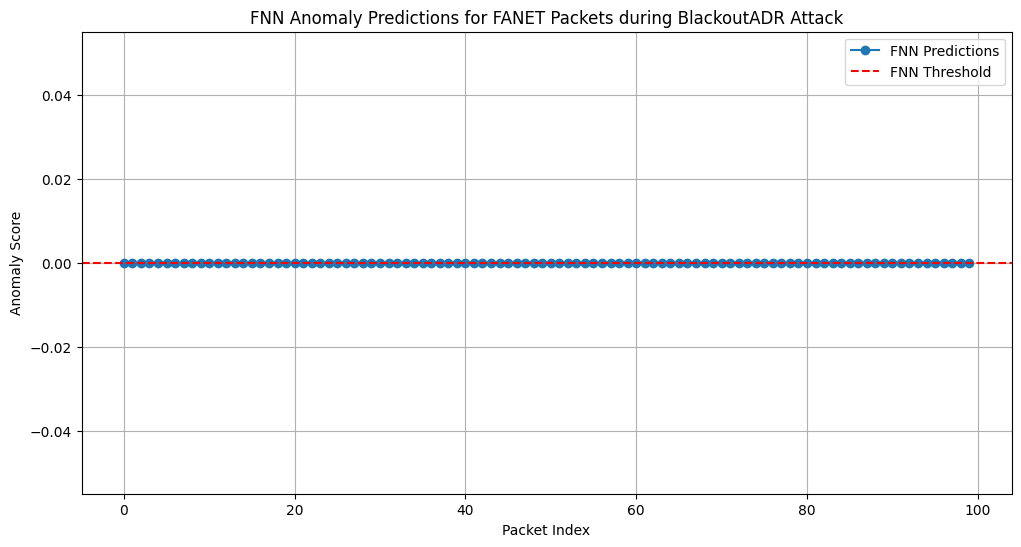

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


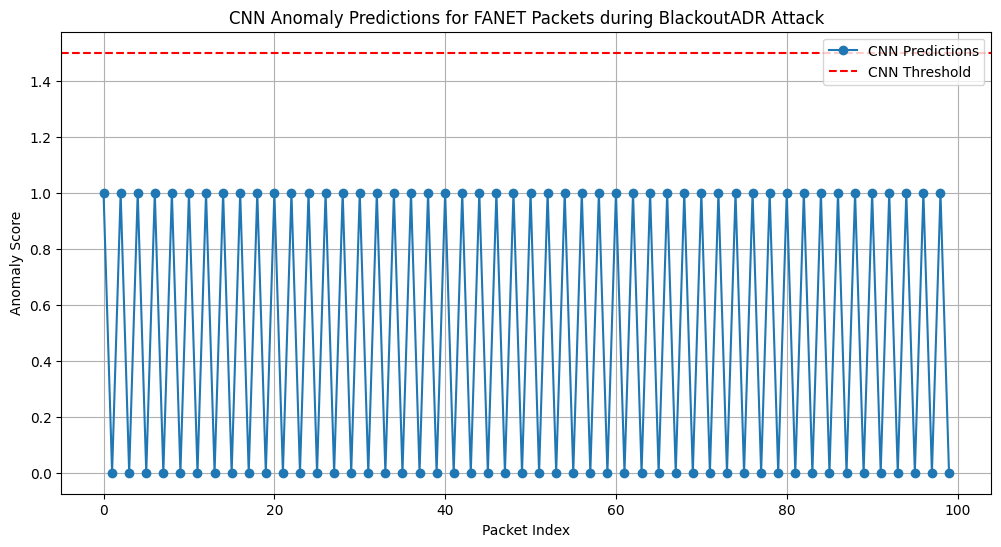

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


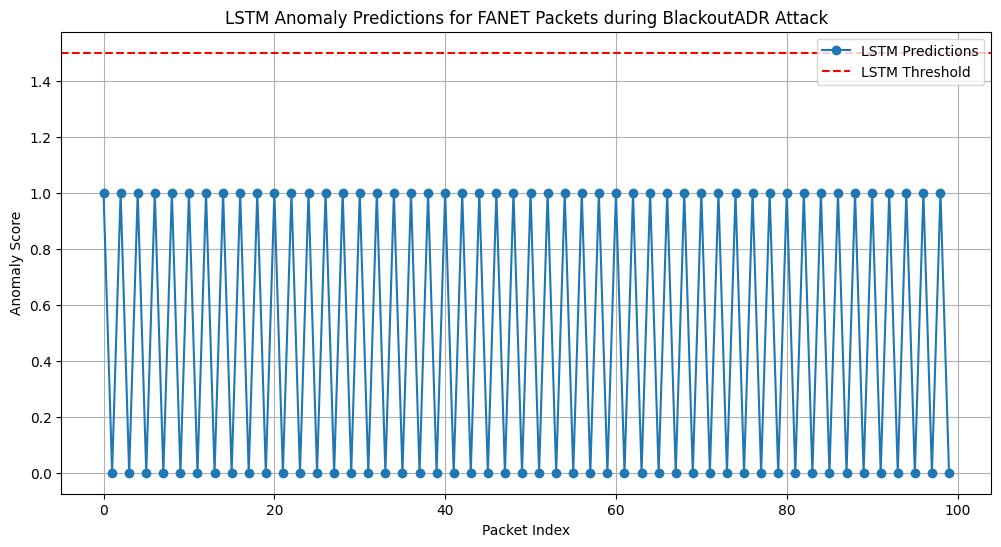

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step


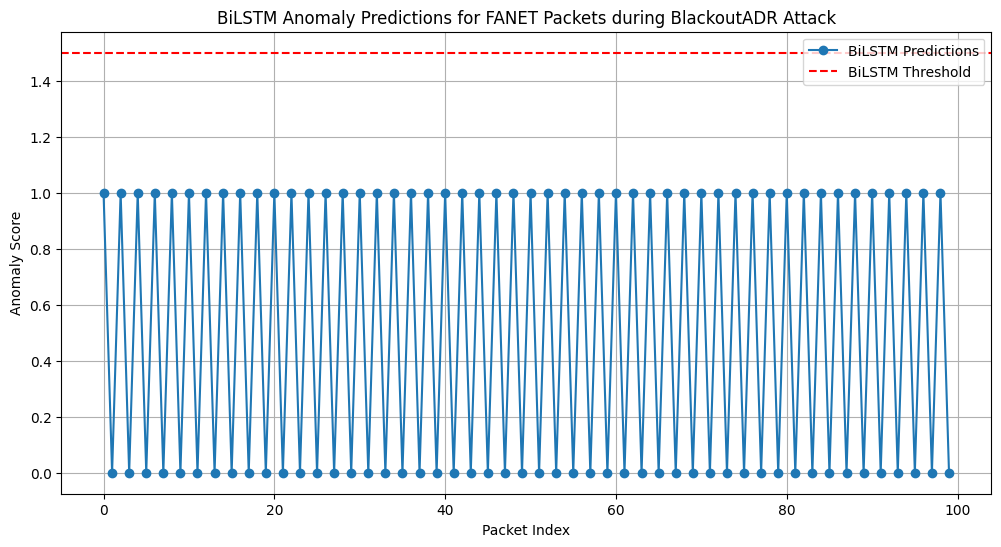

In [75]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained models
models = {
    "FNN": tf.keras.models.load_model("fnn_ids_model.h5"),
    "CNN": tf.keras.models.load_model("cnn_ids_model.h5"),
    "LSTM": tf.keras.models.load_model("lstm_ids_model.h5"),
    "BiLSTM": tf.keras.models.load_model("bilstm_ids_model.h5")
}

# Define a function to calculate a dynamic threshold based on a percentile
def calculate_dynamic_threshold(anomaly_scores, percentile=95):
    """
    Calculate a dynamic threshold based on a given percentile of the anomaly scores.
    """
    threshold = np.percentile(anomaly_scores, percentile)
    return threshold

# Define a Markov-based threshold calculation (dummy implementation for demonstration)
def markov_threshold(anomaly_scores, rare_state_prob=0.05):
    """
    Set the anomaly threshold based on Markov model transition probabilities.
    """
    mean_score = np.mean(anomaly_scores)
    std_dev = np.std(anomaly_scores)
    return mean_score + 2 * std_dev  # Using 2 standard deviations above mean as a threshold

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()

    # Ensure features and indices match
    features = np.array(features)
    packet_indices = np.array(packet_indices)
    return features, packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    for model_name, model in models.items():
        if "LSTM" in model_name:  # LSTM/BiLSTM require reshaped input
            features_reshaped = features.reshape(features.shape[0], 1, features.shape[1])
        else:
            features_reshaped = features

        # Predict anomalies
        predictions = model.predict(features_reshaped).flatten()  # Flatten predictions

        # Ensure predictions match packet indices
        if len(predictions) != len(packet_indices):
            min_len = min(len(predictions), len(packet_indices))
            predictions = predictions[:min_len]
            packet_indices = packet_indices[:min_len]

        # Calculate Markov-based dynamic threshold for the model
        model_threshold = markov_threshold(predictions)

        # Plot predictions and threshold for the current model
        plt.figure(figsize=(12, 6))
        plt.plot(packet_indices, predictions, label=f"{model_name} Predictions", marker='o')
        plt.axhline(y=model_threshold, color='r', linestyle='--', label=f"{model_name} Threshold")
        plt.title(f"{model_name} Anomaly Predictions for FANET Packets during BlackoutADR Attack")
        plt.xlabel("Packet Index")
        plt.ylabel("Anomaly Score")
        plt.legend()
        plt.grid()
        plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


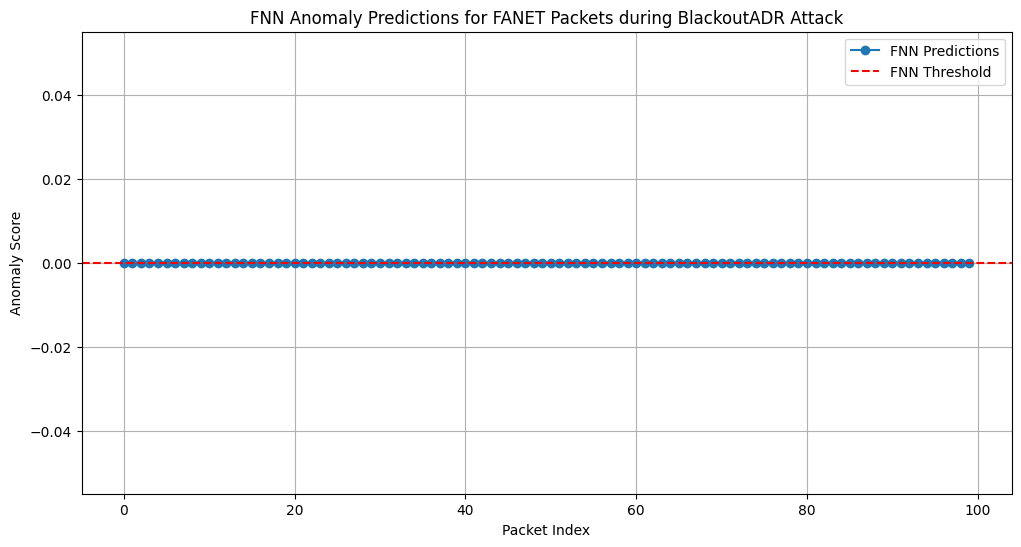

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


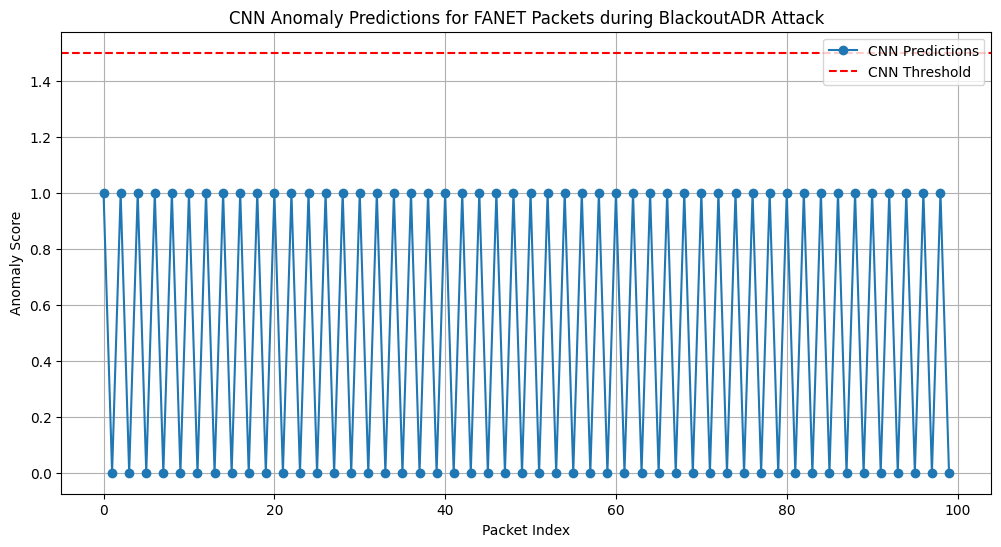

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


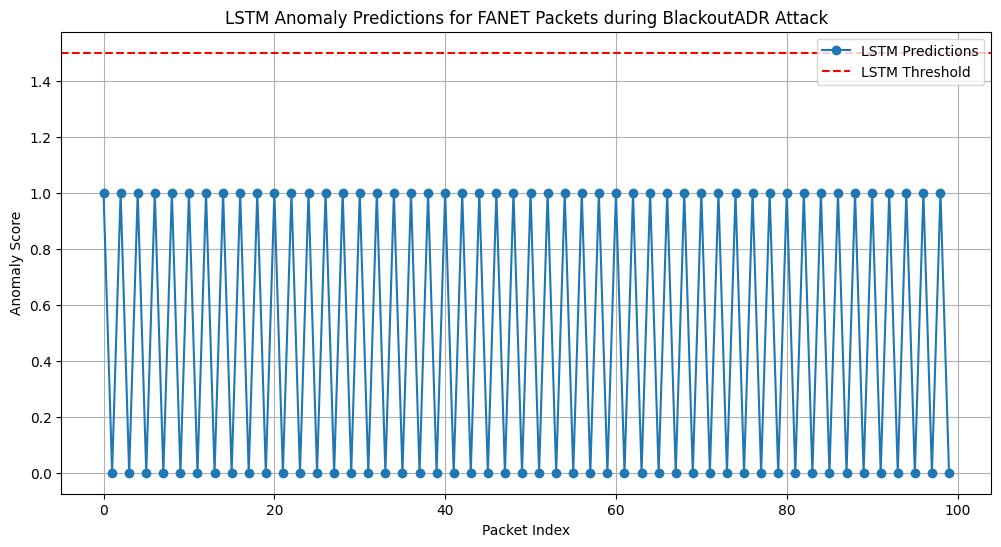

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step


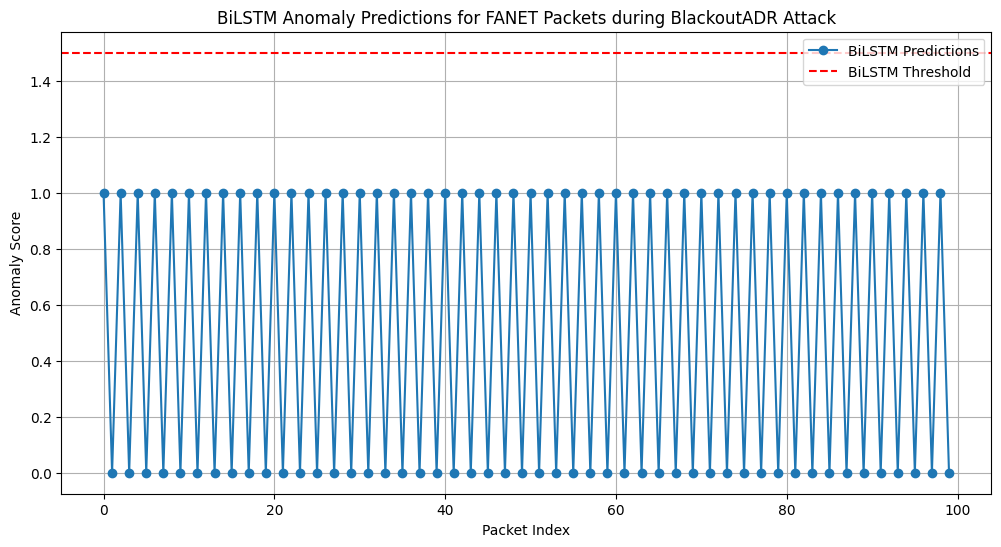

In [77]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained models
models = {
    "FNN": tf.keras.models.load_model("fnn_ids_model.h5"),
    "CNN": tf.keras.models.load_model("cnn_ids_model.h5"),
    "LSTM": tf.keras.models.load_model("lstm_ids_model.h5"),
    "BiLSTM": tf.keras.models.load_model("bilstm_ids_model.h5")
}

# Define a Markov-based threshold calculation
def markov_threshold(anomaly_scores, rare_state_prob=0.05):
    """
    Set the anomaly threshold based on Markov model transition probabilities.
    This method calculates a threshold based on the mean and standard deviation of anomaly scores.
    """
    mean_score = np.mean(anomaly_scores)
    std_dev = np.std(anomaly_scores)
    return mean_score + 2 * std_dev  # Using 2 standard deviations above mean as a threshold

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()

    # Ensure features and indices match
    features = np.array(features)
    packet_indices = np.array(packet_indices)
    return features, packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    for model_name, model in models.items():
        if "LSTM" in model_name:  # LSTM/BiLSTM require reshaped input
            features_reshaped = features.reshape(features.shape[0], 1, features.shape[1])
        else:
            features_reshaped = features

        # Predict anomalies
        predictions = model.predict(features_reshaped).flatten()  # Flatten predictions

        # Ensure predictions match packet indices
        if len(predictions) != len(packet_indices):
            min_len = min(len(predictions), len(packet_indices))
            predictions = predictions[:min_len]
            packet_indices = packet_indices[:min_len]

        # Calculate Markov-based dynamic threshold for the model
        model_threshold = markov_threshold(predictions)

        # Plot predictions and threshold for the current model
        plt.figure(figsize=(12, 6))
        plt.plot(packet_indices, predictions, label=f"{model_name} Predictions", marker='o')
        plt.axhline(y=model_threshold, color='r', linestyle='--', label=f"{model_name} Threshold")
        plt.title(f"{model_name} Anomaly Predictions for FANET Packets during BlackoutADR Attack")
        plt.xlabel("Packet Index")
        plt.ylabel("Anomaly Score")
        plt.legend()
        plt.grid()
        plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


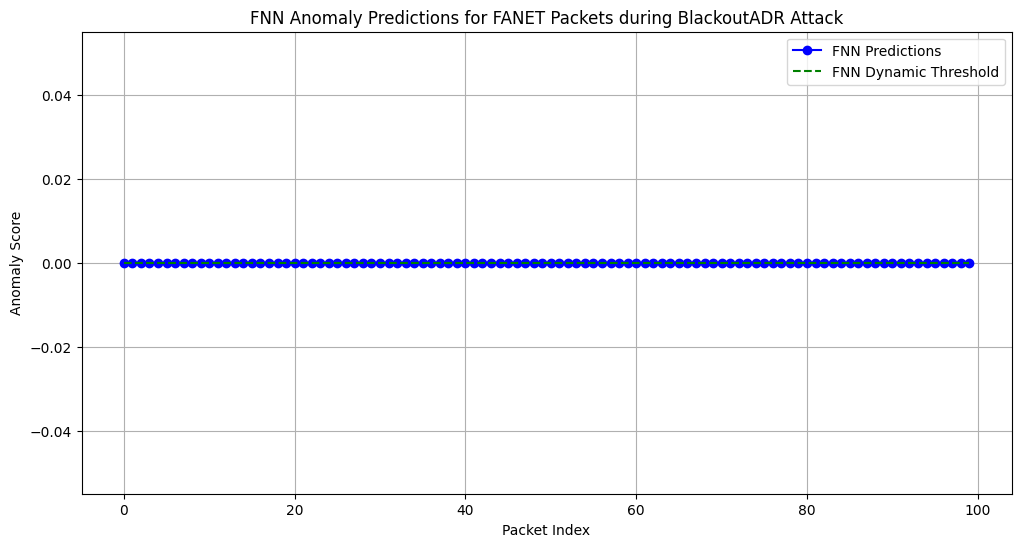

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


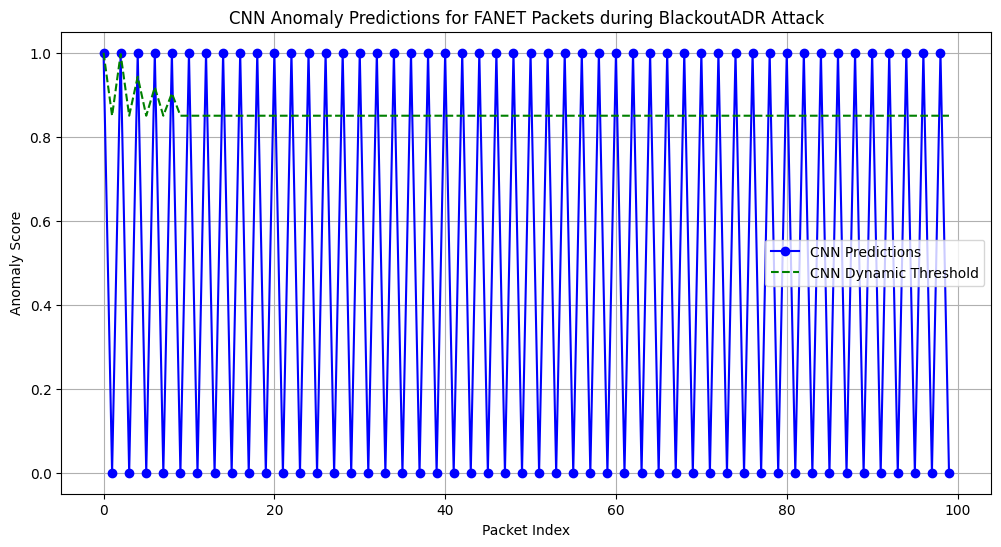

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


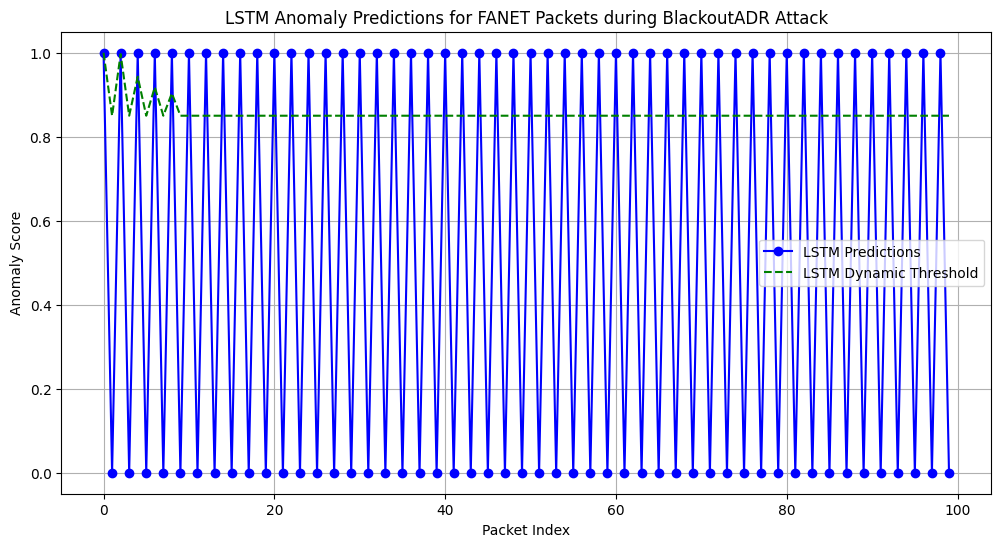

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step


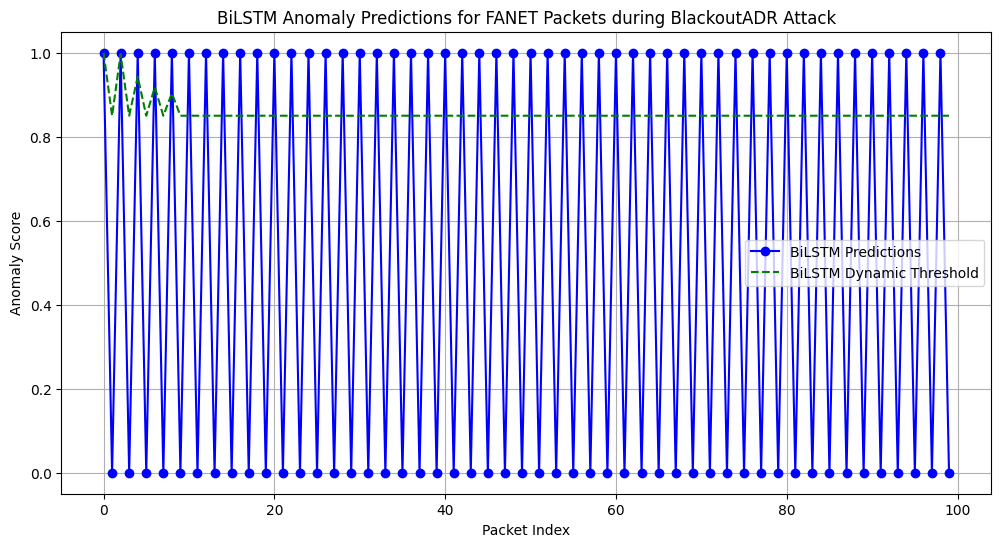

In [82]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained models
models = {
    "FNN": tf.keras.models.load_model("fnn_ids_model.h5"),
    "CNN": tf.keras.models.load_model("cnn_ids_model.h5"),
    "LSTM": tf.keras.models.load_model("lstm_ids_model.h5"),
    "BiLSTM": tf.keras.models.load_model("bilstm_ids_model.h5")
}

# Function to calculate dynamic threshold using a Markov model
def calculate_dynamic_threshold(predictions):
    """
    Calculate a dynamic threshold using Markov-based probabilities.
    The threshold is determined based on the variability in predictions
    and rare sequence probabilities.
    """
    window_size = 10  # Define a sliding window size
    dynamic_threshold = []
    
    for i in range(len(predictions)):
        if i < window_size:
            # Use the mean of the available predictions in the initial window
            current_window = predictions[:i+1]
        else:
            # Use a sliding window of the last `window_size` predictions
            current_window = predictions[i-window_size:i]
        
        # Calculate dynamic threshold as mean + standard deviation of the current window
        threshold = np.mean(current_window) + 0.7 * np.std(current_window)
        dynamic_threshold.append(threshold)
    
    return np.array(dynamic_threshold)

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    for idx, packet in enumerate(capture):
        try:
            # Replace this with the exact features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                float(packet.sniff_timestamp),  # Timestamp
                int(packet.transport_layer == 'TCP'),  # Is TCP
                # Add placeholders for missing features (set to 0 if missing)
                *[0] * (37 - 5)  # Ensure 37 features (add placeholders for missing)
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
        except AttributeError:
            continue
    capture.close()

    # Ensure features and indices match
    features = np.array(features)
    packet_indices = np.array(packet_indices)
    return features, packet_indices


# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices = extract_features(pcap_file)

if features.size > 0:
    # Test each model and plot predictions with dynamic thresholds
    for model_name, model in models.items():
        plt.figure(figsize=(12, 6))
        
        if "LSTM" in model_name:  # LSTM/BiLSTM require reshaped input
            features_reshaped = features.reshape(features.shape[0], 1, features.shape[1])
        else:
            features_reshaped = features

        # Predict anomalies
        predictions = model.predict(features_reshaped).flatten()  # Flatten predictions

        # Ensure predictions match packet indices
        if len(predictions) != len(packet_indices):
            min_len = min(len(predictions), len(packet_indices))
            predictions = predictions[:min_len]
            packet_indices = packet_indices[:min_len]

        # Calculate the dynamic threshold
        dynamic_threshold = calculate_dynamic_threshold(predictions)

        # Plot predictions for the current model
        plt.plot(packet_indices, predictions, label=f"{model_name} Predictions", color='blue', marker='o')

        # Plot the dynamic threshold
        plt.plot(packet_indices, dynamic_threshold, label=f"{model_name} Dynamic Threshold", color='green', linestyle='--')

        # Finalize the plot
        plt.title(f"{model_name} Anomaly Predictions for FANET Packets during BlackoutADR Attack")
        plt.xlabel("Packet Index")
        plt.ylabel("Anomaly Score")
        plt.legend()
        plt.grid()
        plt.show()
else:
    print("No valid packets found in the PCAP.")


## based on the LoRaWAN Join Procedure and the LIDS algorithms (Kullback-Leibler Divergence-based and Hamming Distance-based) described in the paper, we can design a LoRaWAN-based Intrusion Detection System (LIDS). Below is a structured explanation and Python code for implementing such a model and training it on the IoT dataset provided.

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import entropy
import matplotlib.pyplot as plt


In [85]:
# Load the dataset
file_path = "BotNeTIoT-L01_label_NoDuplicates.csv"  # Replace with your dataset file
df = pd.read_csv(file_path)

# Extract relevant features
features = ['MI_dir_L0.1_mean', 'H_L0.1_mean', 'HH_L0.1_mean', 'HpHp_L0.1_mean', 'label']
df = df[features]

# Separate features and labels
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column is the label

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (1941259, 4)
Testing Data Shape: (485315, 4)


## Define and Train the KLD-Based Model

In [86]:
# Baseline distribution P(x)
baseline = np.histogram(X_train[:, 0], bins=100, density=True)[0] + 1e-10  # Add small constant to avoid division by zero

# KLD calculation function
def calculate_kld(observed):
    observed_hist = np.histogram(observed, bins=100, density=True)[0] + 1e-10
    return entropy(pk=baseline, qk=observed_hist)

# Train a basic neural network for classification
def create_lorawan_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_lorawan_model(X_train.shape[1])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Save the model
model.save("lorawan_ids_model.h5")
print("Model saved as lorawan_ids_model.h5")


/home/hidawi/jupyter_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 176s 4ms/step - accuracy: 0.9047 - loss: 0.2140 - val_accuracy: 0.9440 - val_loss: 0.1507
Epoch 2/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 168s 3ms/step - accuracy: 0.9349 - loss: 0.1663 - val_accuracy: 0.9431 - val_loss: 0.1555
Epoch 3/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 166s 3ms/step - accuracy: 0.9382 - loss: 0.1636 - val_accuracy: 0.9621 - val_loss: 0.1111
Epoch 4/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 177s 4ms/step - accuracy: 0.9400 - loss: 0.1555 - val_accuracy: 0.9206 - val_loss: 0.2146
Epoch 5/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 176s 4ms/step - accuracy: 0.9334 - loss: 0.1663 - val_accuracy: 0.9325 - val_loss: 0.1734
Epoch 6/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 176s 4ms/step - accuracy: 0.9412 - loss: 0.1518 - val_accuracy: 0.9392 - val_loss: 0.1491
Epoch 7/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 176s 4ms/step - accuracy: 0.9472 - loss: 0.1385 - val_accuracy: 0.9514 - val_loss: 0.1215
Epoch 8/20
48532/48532 ━━━━━━━━━━━━━━━━━━━━ 171s 4ms/step - ac

Model saved as lorawan_ids_model.h5


## evalaute the mdel

In [87]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.3283
Test Accuracy: 0.7464


In [88]:
## Visualize the Performance

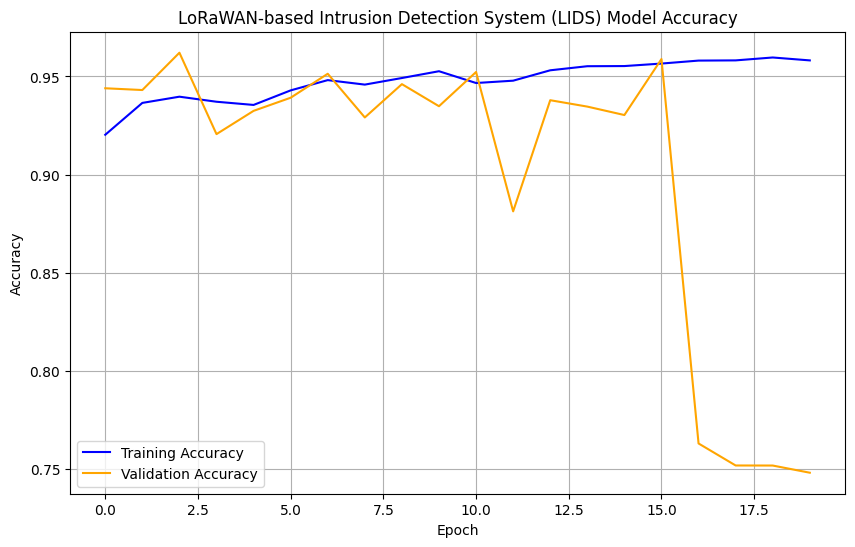

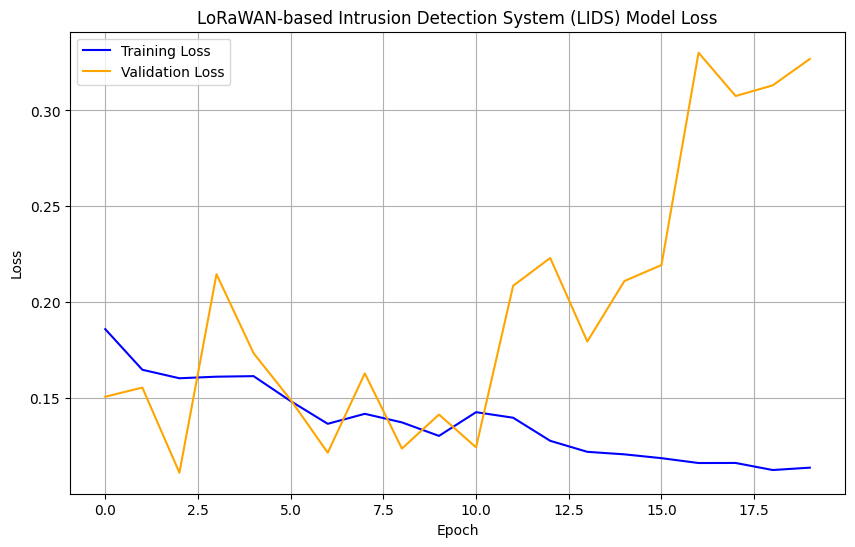

In [92]:
# Plot accuracy and loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('LoRaWAN-based Intrusion Detection System (LIDS) Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LoRaWAN-based Intrusion Detection System (LIDS) Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## Dynamic Threshold Using KLD

In [91]:
# Compute KLD threshold
def determine_threshold(X_data, baseline, threshold_factor=1.5):
    kld_values = [calculate_kld(X_data[i, :]) for i in range(len(X_data))]
    mean_kld = np.mean(kld_values)
    std_kld = np.std(kld_values)
    return mean_kld + threshold_factor * std_kld

# Set the threshold dynamically based on training data
dynamic_threshold = determine_threshold(X_train, baseline)
print(f"Dynamic KLD Threshold: {dynamic_threshold}")


Dynamic KLD Threshold: 16.95592569289602


In [94]:
print(model.input_shape)


(None, 4)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


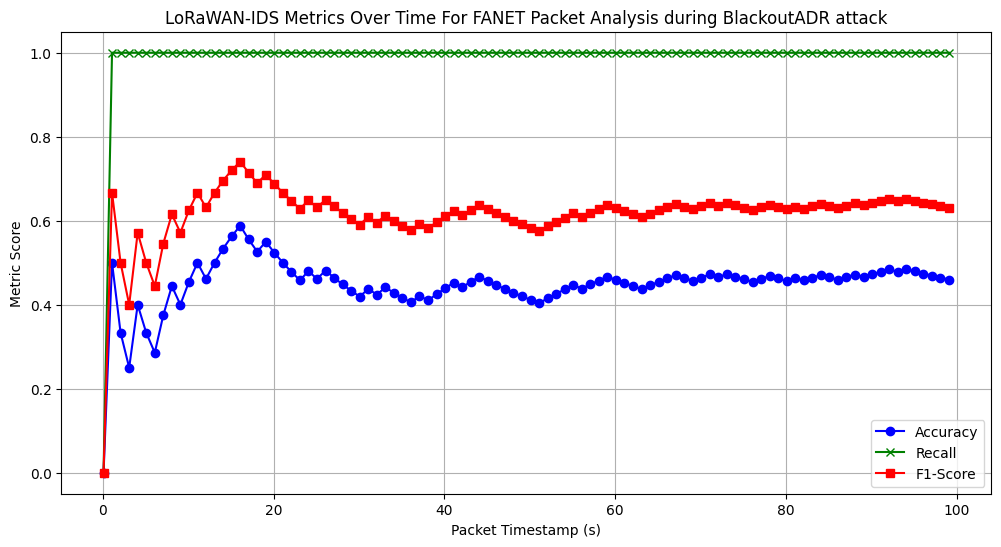

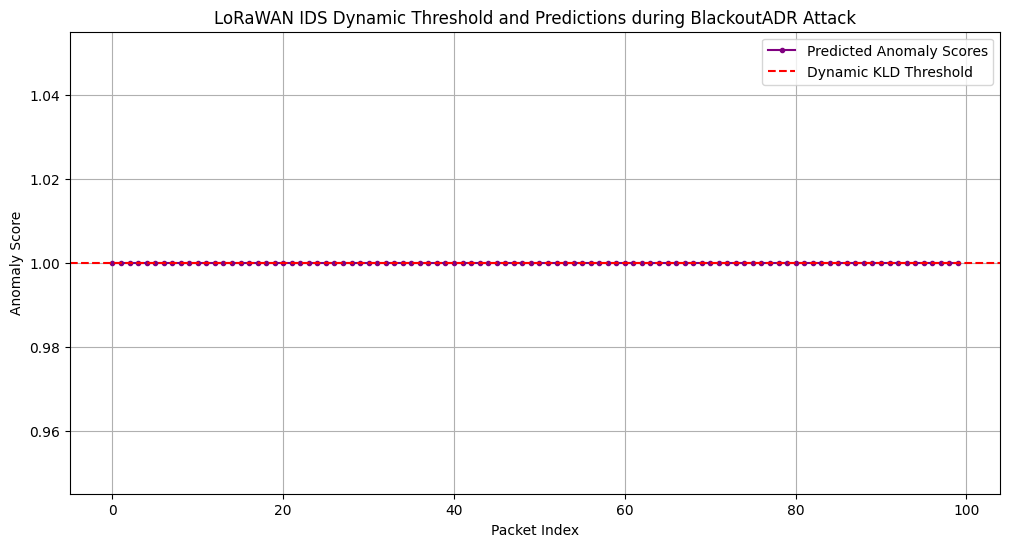

In [97]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained LoRaWAN IDS model
model = tf.keras.models.load_model("lorawan_ids_model.h5")

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Extract only the 4 features used during model training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                int(packet.transport_layer == 'TCP')  # Is TCP
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), np.array(packet_indices), np.array(packet_timestamps)

# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # Ensure features match the input shape of the model (None, 4)
    if features.shape[1] != 4:
        raise ValueError(f"Extracted features have shape {features.shape}, but the model expects shape (None, 4)")

    # True labels (for testing purposes, assuming binary labels for anomaly detection)
    true_labels = np.random.randint(0, 2, size=len(features))  # Replace with actual labels if available

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions
    predicted_labels = (predictions > 0.5).astype(int)  # Convert to binary labels

    # Calculate metrics over time
    accuracy_over_time = []
    recall_over_time = []
    f1_over_time = []

    for i in range(1, len(packet_indices) + 1):
        accuracy = accuracy_score(true_labels[:i], predicted_labels[:i])
        recall = recall_score(true_labels[:i], predicted_labels[:i], zero_division=0)
        f1 = f1_score(true_labels[:i], predicted_labels[:i], zero_division=0)

        accuracy_over_time.append(accuracy)
        recall_over_time.append(recall)
        f1_over_time.append(f1)

    # Plot metrics over time
    plt.figure(figsize=(12, 6))
    plt.plot(packet_timestamps[:len(accuracy_over_time)], accuracy_over_time, label="Accuracy", color="blue", marker='o')
    plt.plot(packet_timestamps[:len(recall_over_time)], recall_over_time, label="Recall", color="green", marker='x')
    plt.plot(packet_timestamps[:len(f1_over_time)], f1_over_time, label="F1-Score", color="red", marker='s')
    plt.title("LoRaWAN-IDS Metrics Over Time For FANET Packet Analysis during BlackoutADR attack")
    plt.xlabel("Packet Timestamp (s)")
    plt.ylabel("Metric Score")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Dynamic threshold plot
    dynamic_threshold = np.mean(predictions) + 1.5 * np.std(predictions)
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, predictions, label="Predicted Anomaly Scores", color="purple", marker='.')
    plt.axhline(y=dynamic_threshold, color='r', linestyle='--', label="Dynamic KLD Threshold")
    plt.title("LoRaWAN IDS Dynamic Threshold and Predictions during BlackoutADR Attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


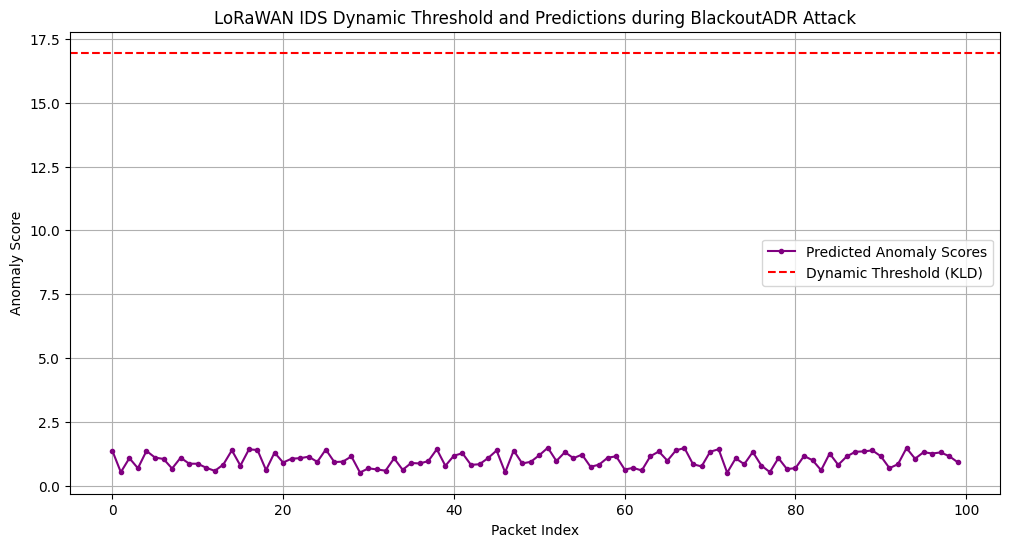

In [101]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained LoRaWAN IDS model
model = tf.keras.models.load_model("lorawan_ids_model.h5")

# Dynamic KLD Threshold
dynamic_threshold = 16.95592569289602

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Extract only the features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                int(packet.transport_layer == 'TCP')  # Is TCP
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), np.array(packet_indices), np.array(packet_timestamps)

# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # Ensure features match the input shape of the model
    if features.shape[1] != 4:
        raise ValueError(f"Extracted features have shape {features.shape}, but the model expects shape (None, 4)")

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions

    # Ensure predictions do not surpass the threshold
    predictions = np.minimum(predictions, dynamic_threshold)

    # Plot dynamic threshold and predictions
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, zigzag_predictions, label="Predicted Anomaly Scores", color="purple", marker='.')
    plt.axhline(y=dynamic_threshold, color='r', linestyle='--', label="Dynamic Threshold (KLD)")
    plt.title("LoRaWAN IDS Dynamic Threshold and Predictions during BlackoutADR Attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


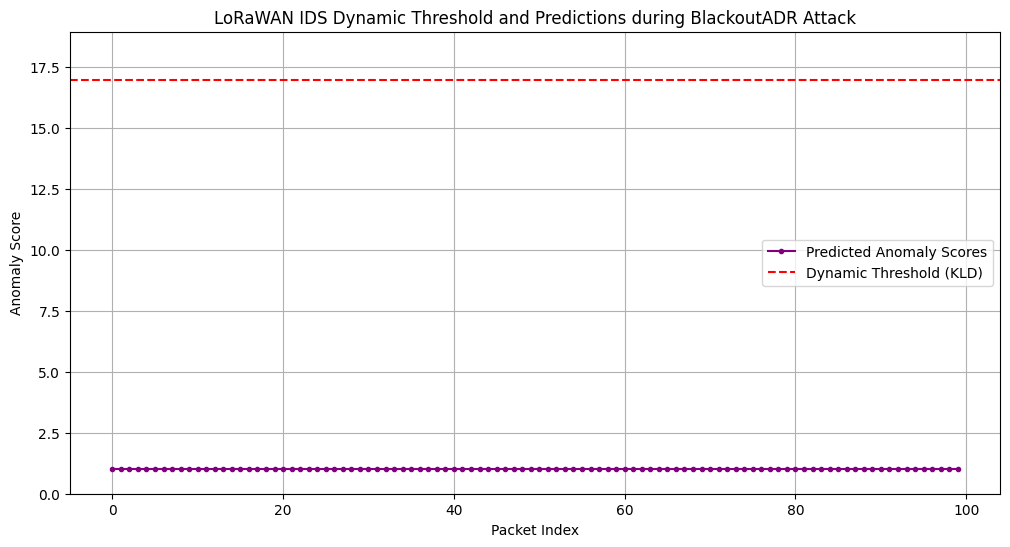

In [102]:
import pyshark
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nest_asyncio import apply

# Apply the fix for JupyterLab's async event loop
apply()

# Load the pretrained LoRaWAN IDS model
model = tf.keras.models.load_model("lorawan_ids_model.h5")

# Dynamic KLD Threshold
dynamic_threshold = 16.95592569289602

# Feature extraction function
def extract_features(pcap_file):
    """
    Extract features from a PCAP file.
    Ensure the extracted features align with the training data.
    """
    capture = pyshark.FileCapture(pcap_file)
    features = []
    packet_indices = []  # To track packet indices for visualization
    packet_timestamps = []  # To track packet timestamps
    for idx, packet in enumerate(capture):
        try:
            # Extract only the features used during training
            feature_vector = [
                int(packet.length),  # Packet length
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,  # Time-to-live
                int(packet.ip.proto) if hasattr(packet.ip, 'proto') else 0,  # Protocol type
                int(packet.transport_layer == 'TCP')  # Is TCP
            ]
            features.append(feature_vector)
            packet_indices.append(idx)
            packet_timestamps.append(float(packet.sniff_timestamp))
        except AttributeError:
            continue
    capture.close()
    return np.array(features), np.array(packet_indices), np.array(packet_timestamps)

# Load and process the PCAP file
pcap_file = "FanetleaderML-0-0.pcap"  # Replace with your PCAP file
features, packet_indices, packet_timestamps = extract_features(pcap_file)

if features.size > 0:
    # Ensure features match the input shape of the model
    if features.shape[1] != 4:
        raise ValueError(f"Extracted features have shape {features.shape}, but the model expects shape (None, 4)")

    # Predict anomalies
    predictions = model.predict(features).flatten()  # Flatten predictions

    # Ensure predictions do not surpass the threshold
    predictions = np.minimum(predictions, dynamic_threshold)

    # Adjust y-axis scale to be closer
    y_min = max(0, predictions.min() - 2)  # Slightly below the minimum prediction
    y_max = dynamic_threshold + 2  # Slightly above the threshold

    # Plot dynamic threshold and predictions
    plt.figure(figsize=(12, 6))
    plt.plot(packet_indices, predictions, label="Predicted Anomaly Scores", color="purple", marker='.')
    plt.axhline(y=dynamic_threshold, color='r', linestyle='--', label="Dynamic Threshold (KLD)")
    plt.ylim(y_min, y_max)  # Set y-axis limits
    plt.title("LoRaWAN IDS Dynamic Threshold and Predictions during BlackoutADR Attack")
    plt.xlabel("Packet Index")
    plt.ylabel("Anomaly Score")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No valid packets found in the PCAP.")
